In [92]:
import numpy as np
import pandas as pd

# 假设有四个指标的数据，存储在 DataFrame 中
data = {
    'tps': [100, 150, 120, 130],
    'error_rate': [10, 15, 8, 12],
    'delay': [5, 8, 6, 7],
    'write_rate': [200, 180, 210, 190]
}

df = pd.DataFrame(data)

# 数据归一化
df_normalized = (df - df.min()) / (df.max() - df.min())

# 计算信息熵
entropy = (-1) * (1 / np.log(len(df))) * ((df_normalized * np.log(df_normalized)).sum())

# 计算权重
weight = (1 - entropy) / sum(1 - entropy)

print("Entropy:", entropy)
print("Weight:", weight)

Entropy: tps           0.485475
error_rate    0.488866
delay         0.459148
write_rate    0.459148
dtype: float64
Weight: tps           0.244156
error_rate    0.242547
delay         0.256649
write_rate    0.256649
dtype: float64


F:\Tools\Anaconda3\envs\Auto-Tuning-HLF\lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [95]:
from Model import initialize

configParameters = initialize.read_yaml_config('F:/Project/PythonProject/Auto-Tuning-HLF/Benchmark_Deploy_Tool/config.yaml')
mysql_connection, engine = initialize.mysql_connect(configParameters['Database']['Mysql']['Host'],
                                                        configParameters['Database']['Mysql']['Port'],
                                                        configParameters['Database']['Mysql']['User'],
                                                        configParameters['Database']['Mysql']['Password'],
                                                        configParameters['Database']['Mysql']['Database'])

In [109]:

def plot_combined_graph(dataframe):
    fig, ax = plt.subplots(figsize=(8, 6))  # 创建一个图

    # 绘制第一个散点图，纵坐标为 throughput，横坐标为 disc_write
    ax.scatter(dataframe['disc_write'], dataframe['throughput'], label='Disc Write')

    # 绘制第二个散点图，纵坐标为 throughput，横坐标为 avg_latency
    ax.scatter(dataframe['avg_latency'], dataframe['throughput'], label='Avg Latency')

    ax.set_xlabel('Disc Write / Avg Latency')
    ax.set_ylabel('Throughput')
    ax.set_title('Throughput vs Disc Write / Avg Latency')

    ax.legend()
    plt.show()

In [110]:
from matplotlib import pyplot as plt


def plot_three_graphs(dataframe):
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))  # 创建三个子图

    # 遍历每个子图
    for i, feature in enumerate(['disc_write', 'avg_latency', 'error_rate']):
        # dataframe = dataframe.sort_values(by=[feature, 'throughput'], ascending=[True, True])
        # dataframe = dataframe.sort_values(by=['throughput'], ascending=[True])
        axes[i].scatter(dataframe[feature], dataframe['throughput'], s=3)  # 调整散点大小
        axes[i].set_xlabel(feature.capitalize())  # 将特征名首字母大写
        axes[i].set_ylabel('Throughput')
        axes[i].set_title(f'Throughput vs {feature.capitalize()}')

    plt.tight_layout()  # 调整布局，防止重叠
    plt.show()

In [106]:
def plot_three_graphs_distribution(dataframe):
    import matplotlib.pyplot as plt
    import matplotlib
    # matplotlib.rcParams['font.sans-serif'] = ['KaiTi']
    import seaborn as sns
    sns.set(style='ticks')
    plt.rcParams['font.sans-serif'] = 'SimHei'
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 创建三个子图

    # 设置三个经典颜色
    colors = ['blue', 'orange', 'green', 'red']

    # 遍历每个子图
    for i, feature in enumerate(['avg_latency', 'error_rate', 'throughput']):
        axes[i].hist(dataframe[feature], bins=20, alpha=0.7, edgecolor = 'k')  # 使用不同颜色绘制柱状图
        if feature == 'avg_latency':
            axes[i].set_xlabel('延迟')
        if feature == 'error_rate':
            axes[i].set_xlabel('错误率')
        if feature == 'throughput':
            axes[i].set_xlabel('吞吐量')
        axes[i].set_ylabel('频率')

    plt.tight_layout()  # 调整布局，防止重叠
    plt.show()

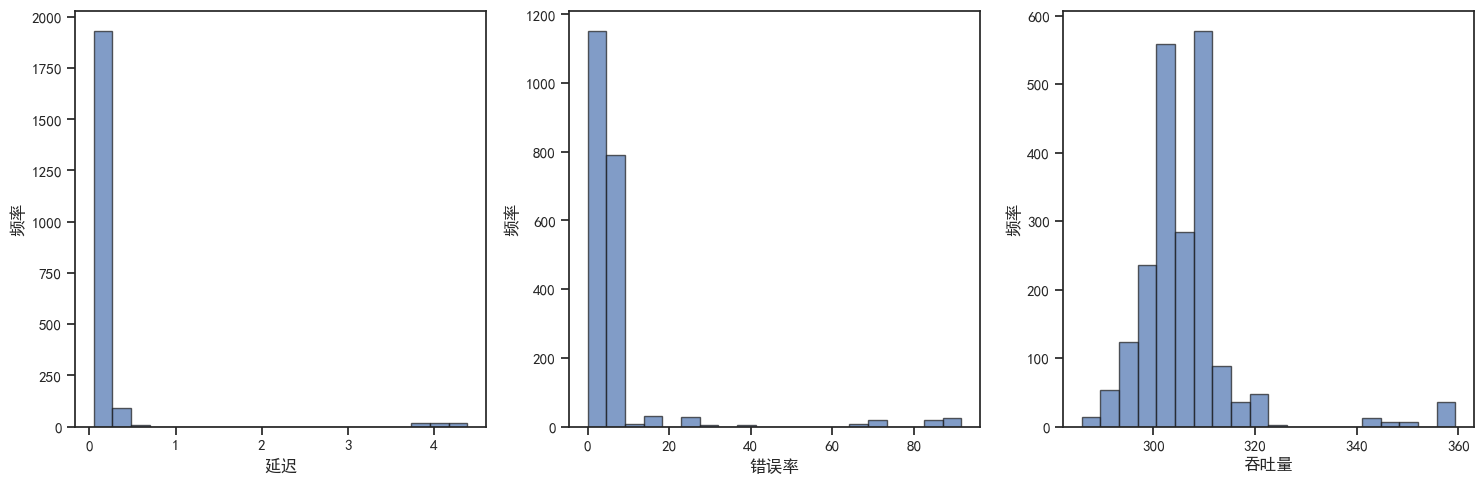

In [107]:
df = pd.read_sql('dataset', con=engine)
filtered_df = df[~df['bench_config'].isin(['query', 'open'])]
# filtered_df = filtered_df.sort_values(by=['avg_latency', 'throughput'], ascending=[True, True])
# filtered_df = filtered_df.sort_values(by='throughput')  # 按照 throughput 排序数据

plot_three_graphs_distribution(filtered_df)

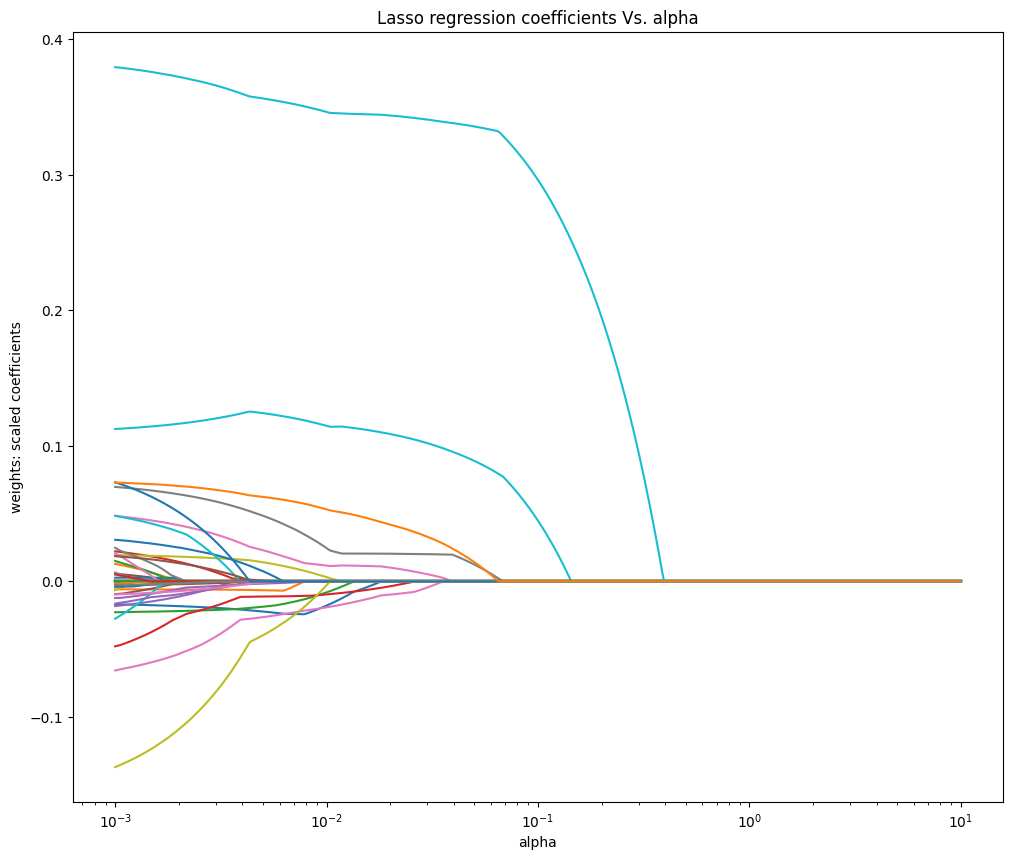

broadcast_validate_duration                  0.346450
Orderer_BatchSize_PreferredMaxBytes          0.114835
broadcast_enqueue_duration                   0.053208
Orderer_BatchSize_MaxMessageCount            0.024592
peer_gossip_dialTimeout                      0.019111
Orderer_General_Authentication_TimeWindow    0.017840
Orderer_BatchTimeout                         0.011692
peer_gossip_aliveTimeInterval                0.009574
Orderer_General_Keepalive_ServerInterval     0.008080
Orderer_BatchSize_AbsoluteMaxBytes           0.003140
gossip_state_commit_duration                 0.002803
dtype: float64


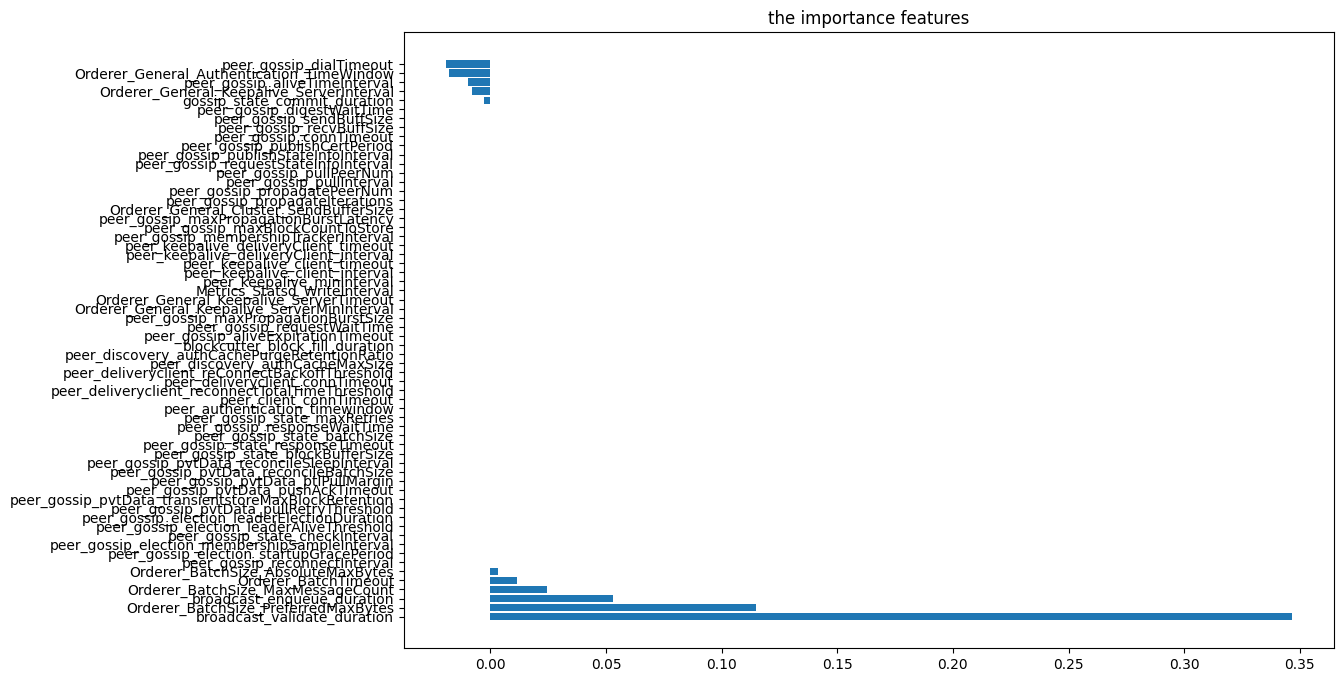

In [113]:
from Model.performance_analyze import get_dataset_lasso

get_dataset_lasso(engine)

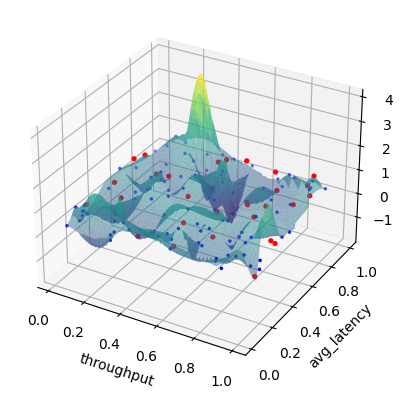

In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.interpolate import griddata

# 假设fitness_和archive_fitness是你的数据

# 生成随机数据作为示例
fitness_ = np.random.rand(100, 3)
archive_fitness = np.random.rand(30, 3)

# 创建3D图
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制点
ax.scatter(fitness_[:, 0], fitness_[:, 1], fitness_[:, 2], s=10, c='blue', marker=".")
ax.scatter(archive_fitness[:, 0], archive_fitness[:, 1], archive_fitness[:, 2], s=30, c='red', marker=".", alpha=1.0)

# 设置坐标轴标签
ax.set_xlabel('throughput')
ax.set_ylabel('avg_latency')
ax.set_zlabel('disc_write')

# 对fitness_进行插值并绘制曲面
x = fitness_[:, 0]
y = fitness_[:, 1]
z = fitness_[:, 2]

xi = np.linspace(min(x), max(x), 100)
yi = np.linspace(min(y), max(y), 100)
xi, yi = np.meshgrid(xi, yi)

zi = griddata((x, y), z, (xi, yi), method='cubic')  # 使用cubic插值方法进行插值

# 绘制曲面
ax.plot_surface(xi, yi, zi, cmap='viridis', alpha=0.5)  # 以较低的alpha值绘制曲面，以便看到散点

plt.show()


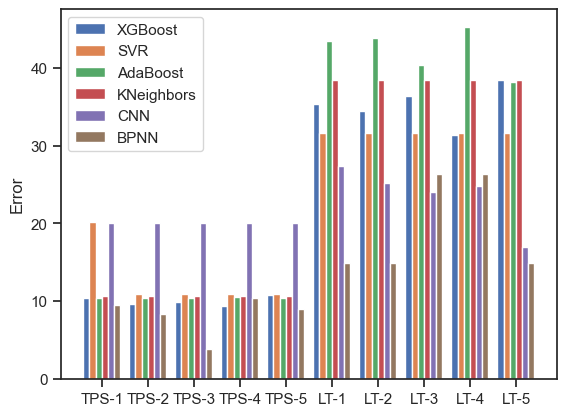

In [1]:
import matplotlib.pyplot as plt
import numpy as np

list1 = np.array([20.06, 20.06, 20.06, 20.06, 20.06, 27.34, 25.14, 24.10, 24.76, 16.94])
list2 = np.array([20.16, 10.89, 10.89, 10.89, 10.89, 31.61, 31.61, 31.61, 31.61, 31.61])
list3 = np.array([10.41, 10.44, 10.40, 10.55, 10.41, 43.43, 43.82, 40.33, 45.30, 38.25])
list4 = np.array([10.67, 10.67, 10.67, 10.67, 10.67, 38.42, 38.42, 38.42, 38.42, 38.42])
list6 = np.array([10.43, 9.67, 9.87, 9.37, 10.77, 35.42, 34.42, 36.42, 31.42, 38.42])
list5 = np.array([9.48, 8.38, 3.78, 10.46, 9.02, 14.84, 14.84, 26.35, 26.35, 14.84])
# print(list1.mean())
# print(list2.mean())
# print(list3.mean())
# print(list4.mean())
# print(list5.mean())
length = len(list1)
x = np.arange(length)
listCol = ['TPS-1', 'TPS-2', 'TPS-3', 'TPS-4', 'TPS-5', 'LT-1', 'LT-2', 'LT-3', 'LT-4', 'LT-5']
plt.figure()
total_width, n = 0.8, 6
width = total_width / n
x1 = x - 2 * width / n
x2 = x1 + width
x3 = x2 + width
x4 = x3 + width
x5 = x4 + width
x6 = x5 + width
import seaborn as sns
sns.set(style='ticks')
plt.ylabel('Error')
plt.bar(x1, list6, width, label='XGBoost')
plt.bar(x2, list2, width, label='SVR')
plt.bar(x3, list3, width, label='AdaBoost')
plt.bar(x4, list4, width, label='KNeighbors')
plt.bar(x5, list1, width, label='CNN')
plt.bar(x6, list5, width, label='BPNN')

plt.xticks(x+0.3, listCol)
plt.legend(ncol=1)
plt.show()


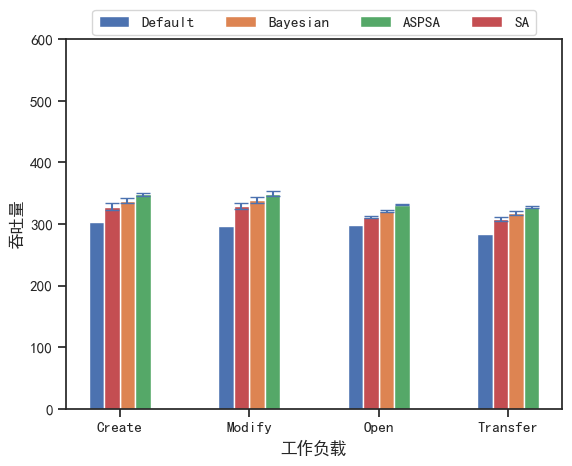

In [41]:
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.rcParams['font.sans-serif'] = ['KaiTi']
import seaborn as sns
sns.set(style='ticks')
plt.rcParams['font.sans-serif'] = 'SimHei'
# 您提供的数据（示例数据，请替换为实际的数值）
x_labels = ['Create', 'Modify', 'Open', 'Transfer']
y_default = [303.5, 296.2, 298.8, 283.0]  # 请替换为实际的默认值
# 303.5 296.2 1812.4 298.8 1826.6 283.0
y_bayesian = [337.97, 338.85, 321.17, 317.51]  # 请替换为实际的贝叶斯值
#  317.97 308.85 1863.41 341.17 1889.81 327.51
y_aspsa = [347.97, 348.85, 331.17, 327.51]  # 请替换为实际的ASPSA值
y_simulated_annealing = [327.97, 328.85, 311.17, 307.51]  # 请替换为实际的模拟退火值

plt.figure()
plt.ylim((0, 600))
bar_width = 0.12
index = range(len(x_labels))
plt.bar(index, y_default, width=bar_width, label='Default')
plt.bar([i + 2 *bar_width for i in index], y_bayesian, width=bar_width, label='Bayesian')
plt.bar([i + 3 * bar_width for i in index], y_aspsa, width=bar_width, label='ASPSA')
plt.bar([i + bar_width for i in index], y_simulated_annealing, width=bar_width, label='SA')

error_bar_default = [5, 6, 3, 4]  # 请替换为实际的误差值
error_bar_bayesian = [4, 5, 2, 3]  # 请替换为实际的误差值
error_bar_aspsa = [3, 4, 1, 2]  # 请替换为实际的误差值
error_bar_simulated_annealing = [6, 5, 2, 3]  # 请替换为实际的误差值

plt.errorbar([i + 2 * bar_width for i in index], y_bayesian, yerr=error_bar_bayesian, fmt='none', capsize=5, label='_error_bayesian')
plt.errorbar([i + 3 * bar_width for i in index], y_aspsa, yerr=error_bar_aspsa, fmt='none', capsize=5, label='_error_aspsa')
plt.errorbar([i + bar_width for i in index], y_simulated_annealing, yerr=error_bar_simulated_annealing, fmt='none', capsize=5, label='_error_simulated_annealing')

plt.xlabel('工作负载')
plt.ylabel('吞吐量')
plt.xticks([i + 1.5 * bar_width for i in index], x_labels)
plt.legend(ncol=4, bbox_to_anchor=(0.5, 1.1), loc='upper center')

# 显示图形
plt.show()


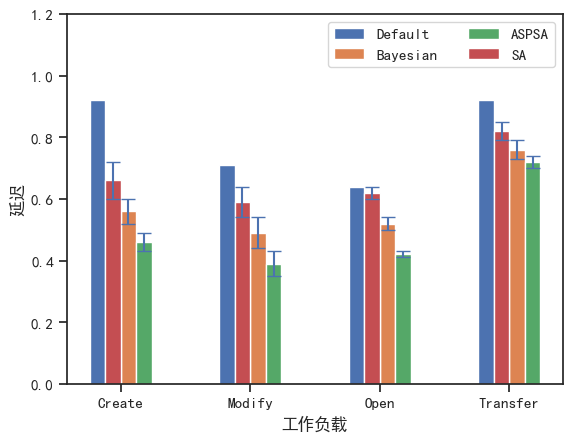

In [45]:
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.rcParams['font.sans-serif'] = ['KaiTi']
import seaborn as sns
sns.set(style='ticks')
plt.rcParams['font.sans-serif'] = 'SimHei'
# 您提供的数据（示例数据，请替换为实际的数值）
x_labels = ['Create', 'Modify', 'Open', 'Transfer']
y_default = [0.92, 0.71, 0.64, 0.92]  # 请替换为实际的默认值
# 0.92 0.71 0.05 0.64 0.05 0.92
y_bayesian = [0.56, 0.49, 0.52, 0.76]  # 请替换为实际的贝叶斯值
# 0.46 0.39 0.04 0.42 0.04 0.78
# 0.44 0.32 0.04 0.37 0.04 0.68
y_aspsa = [0.46, 0.39, 0.42, 0.72]  # 请替换为实际的ASPSA值
y_simulated_annealing = [0.66, 0.59, 0.62, 0.82]  # 请替换为实际的模拟退火值

# 设置图形大小
plt.figure()
# figsize=(10, 6)
# 绘制柱状图
bar_width = 0.12
plt.ylim((0, 1.2))
index = range(len(x_labels))
plt.bar(index, y_default, width=bar_width, label='Default')
plt.bar([i + 2 *bar_width for i in index], y_bayesian, width=bar_width, label='Bayesian')
plt.bar([i + 3 * bar_width for i in index], y_aspsa, width=bar_width, label='ASPSA')
plt.bar([i + bar_width for i in index], y_simulated_annealing, width=bar_width, label='SA')

# 添加误差棒
# error_bar_default = [5, 6, 3, 4]  # 请替换为实际的误差值
error_bar_bayesian = [0.04, 0.05, 0.02, 0.03]  # 请替换为实际的误差值
error_bar_aspsa = [0.03, 0.04, 0.01, 0.02]  # 请替换为实际的误差值
error_bar_simulated_annealing = [0.06, 0.05, 0.02, 0.03]  # 请替换为实际的误差值

# plt.errorbar(index, y_default, yerr=error_bar_default, fmt='none', capsize=5, label='_error_default')
plt.errorbar([i + 2 * bar_width for i in index], y_bayesian, yerr=error_bar_bayesian, fmt='none', capsize=5, label='_error_bayesian')
plt.errorbar([i + 3 * bar_width for i in index], y_aspsa, yerr=error_bar_aspsa, fmt='none', capsize=5, label='_error_aspsa')
plt.errorbar([i + bar_width for i in index], y_simulated_annealing, yerr=error_bar_simulated_annealing, fmt='none', capsize=5, label='_error_simulated_annealing')

# 设置图形属性
plt.xlabel('工作负载')
plt.ylabel('延迟')
# plt.title('TPS')
plt.xticks([i + 1.5 * bar_width for i in index], x_labels)
# plt.legend(ncol=4, bbox_to_anchor=(0.5, 1.1), loc='upper center')
plt.legend(ncol=2, loc='upper right')
# 显示图形
plt.show()


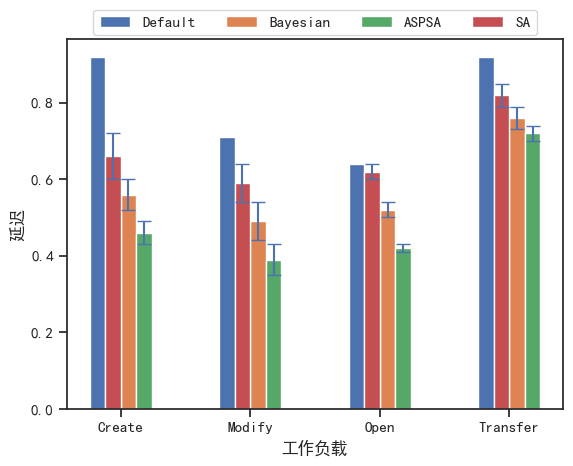

In [22]:
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.rcParams['font.sans-serif'] = ['KaiTi']
import seaborn as sns
sns.set(style='ticks')
plt.rcParams['font.sans-serif'] = 'SimHei'
# 您提供的数据（示例数据，请替换为实际的数值）
x_labels = ['Create', 'Modify', 'Open', 'Transfer']
y_default = [0.92, 0.71, 0.64, 0.92]  # 请替换为实际的默认值
# 0.92 0.71 0.05 0.64 0.05 0.92
y_bayesian = [0.56, 0.49, 0.52, 0.76]  # 请替换为实际的贝叶斯值
# 0.46 0.39 0.04 0.42 0.04 0.78
# 0.44 0.32 0.04 0.37 0.04 0.68
y_aspsa = [0.46, 0.39, 0.42, 0.72]  # 请替换为实际的ASPSA值
y_simulated_annealing = [0.66, 0.59, 0.62, 0.82]  # 请替换为实际的模拟退火值

# 设置图形大小
plt.figure()
# figsize=(10, 6)
# 绘制柱状图
bar_width = 0.12
index = range(len(x_labels))
plt.bar(index, y_default, width=bar_width, label='Default')
plt.bar([i + 2 *bar_width for i in index], y_bayesian, width=bar_width, label='Bayesian')
plt.bar([i + 3 * bar_width for i in index], y_aspsa, width=bar_width, label='ASPSA')
plt.bar([i + bar_width for i in index], y_simulated_annealing, width=bar_width, label='SA')

# 添加误差棒
# error_bar_default = [5, 6, 3, 4]  # 请替换为实际的误差值
error_bar_bayesian = [0.04, 0.05, 0.02, 0.03]  # 请替换为实际的误差值
error_bar_aspsa = [0.03, 0.04, 0.01, 0.02]  # 请替换为实际的误差值
error_bar_simulated_annealing = [0.06, 0.05, 0.02, 0.03]  # 请替换为实际的误差值

# plt.errorbar(index, y_default, yerr=error_bar_default, fmt='none', capsize=5, label='_error_default')
plt.errorbar([i + 2 * bar_width for i in index], y_bayesian, yerr=error_bar_bayesian, fmt='none', capsize=5, label='_error_bayesian')
plt.errorbar([i + 3 * bar_width for i in index], y_aspsa, yerr=error_bar_aspsa, fmt='none', capsize=5, label='_error_aspsa')
plt.errorbar([i + bar_width for i in index], y_simulated_annealing, yerr=error_bar_simulated_annealing, fmt='none', capsize=5, label='_error_simulated_annealing')

# 设置图形属性
plt.xlabel('工作负载')
plt.ylabel('延迟')
# plt.title('TPS')
plt.xticks([i + 1.5 * bar_width for i in index], x_labels)
plt.legend(ncol=4, bbox_to_anchor=(0.5, 1.1), loc='upper center')

# 显示图形
plt.show()


In [40]:
import matplotlib

print(matplotlib.matplotlib_fname())

F:\Tools\Anaconda3\envs\Auto-Tuning-HLF\lib\site-packages\matplotlib\mpl-data\matplotlibrc


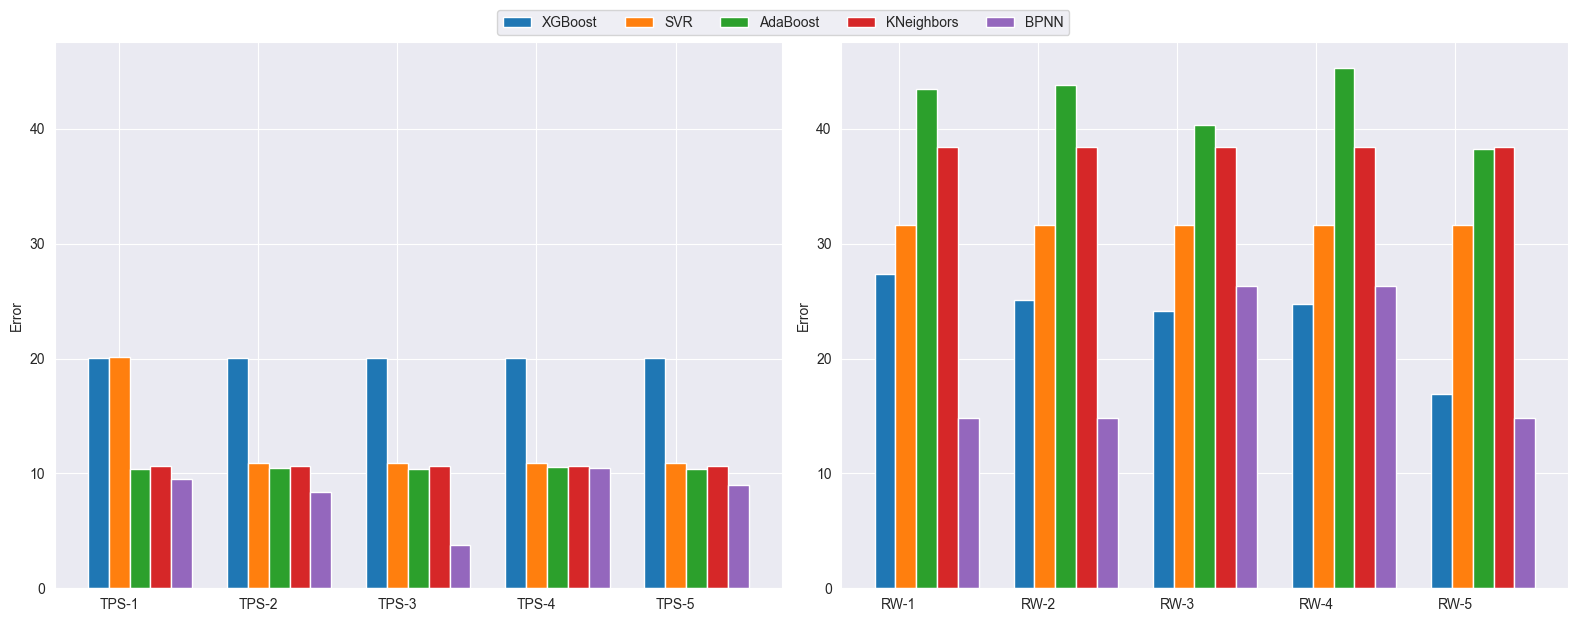

In [33]:
# import matplotlib.pyplot as plt
# import numpy as np
#
# list1 = np.array([20.06, 20.06, 20.06, 20.06, 20.06, 27.34, 25.14, 24.10, 24.76, 16.94])
# list2 = np.array([20.16, 10.89, 10.89, 10.89, 10.89, 31.61, 31.61, 31.61, 31.61, 31.61])
# list3 = np.array([10.41, 10.44, 10.40, 10.55, 10.41, 43.43, 43.82, 40.33, 45.30, 38.25])
# list4 = np.array([10.67, 10.67, 10.67, 10.67, 10.67, 38.42, 38.42, 38.42, 38.42, 38.42])
# list5 = np.array([9.48, 8.38, 3.78, 10.46, 9.02, 14.84, 14.84, 26.35, 26.35, 14.84])
#
# length = len(list1)
# x = np.arange(length)
# listCol = ['TPS-1', 'TPS-2', 'TPS-3', 'TPS-4', 'TPS-5', 'RW-1', 'RW-2', 'RW-3', 'RW-4', 'RW-5']
#
# # 创建两个子图，1行2列
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
#
# ax1.set_ylabel('Error')
# ax1.bar(x[:5] - 0.15, list1[:5], width=0.15, label='XGBoost')
# ax1.bar(x[:5], list2[:5], width=0.15, label='SVR')
# ax1.bar(x[:5] + 0.15, list3[:5], width=0.15, label='AdaBoost')
# ax1.bar(x[:5] + 0.3, list4[:5], width=0.15, label='KNeighbors')
# ax1.bar(x[:5] + 0.45, list5[:5], width=0.15, label='BPNN')
# ax1.set_xticks(x[:5])
# ax1.set_xticklabels(listCol[:5])  # 使用完整的 listCol
#
# # 子图2表示RW
# ax2.set_ylabel('Error')
# ax2.bar(x[:5] - 0.3, list1[5:], width=0.15, label='XGBoost')
# ax2.bar(x[:5] - 0.15, list2[5:], width=0.15, label='SVR')
# ax2.bar(x[:5], list3[5:], width=0.15, label='AdaBoost')
# ax2.bar(x[:5] + 0.15, list4[5:], width=0.15, label='KNeighbors')
# ax2.bar(x[:5] + 0.3, list5[5:], width=0.15, label='BPNN')
# ax2.set_xticks(x[:5] - 0.2)
# ax2.set_xticklabels(listCol[5:])
#
# # Combine legends
# handles, labels = ax2.get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.04), ncol=5)
#
# # 调整布局使标签更靠近
# plt.tight_layout()
# # 调整子图1的y轴范围以子图2为准
# ax1.set_ylim(ax2.get_ylim())
# plt.show()


2292.9
2308.85
2516.7
2927.25
1891.7
2331.05


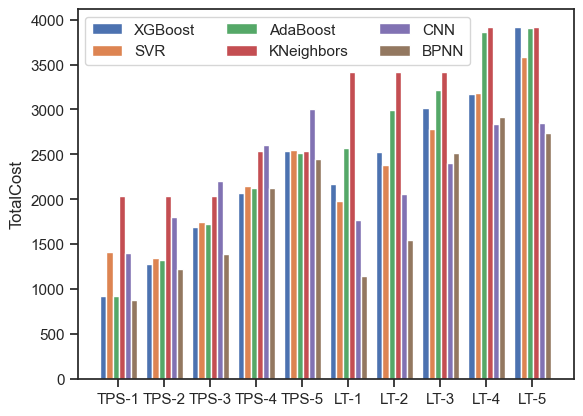

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style='ticks')
# list1 = np.array([903.01, 1703.01, 2503.01, 3303.01, 4103.01, 6304.94, 7104.94, 7904.94, 8704.94, 9504.94])
# list2 = np.array([508.08, 1294.94, 1694.94, 2094.94, 2494.94, 1762.34, 2380.72, 3180.72, 3580.72, 3980.72])
# list3 = np.array([870.86, 1672.20, 2470.35, 3277.75, 4070.81, 2971.74, 3791.05, 4416.74, 5465.05, 5912.88])
# list4 = np.array([3083.90, 3083.90, 3083.90, 4083.90, 4083.90, 4921.45, 4921.45, 4921.45, 5921.45, 5921.45])
# list5 = np.array([1274.05, 2019.18, 2589.31, 3723.06, 4451.14, 3142.26, 1542.26, 2117.93, 1717.93, 3942.26])

list1_tc = []
list2_tc = []
list3_tc = []
list4_tc = []
list5_tc = []
list6_tc = []
for idx in range(0, 10, 1):
    if idx % 5 == 0:
        list1_tc.append(list1[idx]*50 + 400)
        list2_tc.append(list2[idx]*50 + 400)
        list3_tc.append(list3[idx]*50 + 400)
        list5_tc.append(list5[idx]*50 + 400)
        list6_tc.append(list6[idx]*50 + 400)
    elif idx % 5 == 1:
        list1_tc.append(list1[idx]*50 + 800)
        list2_tc.append(list2[idx]*50 + 800)
        list3_tc.append(list3[idx]*50 + 800)
        list5_tc.append(list5[idx]*50 + 800)
        list6_tc.append(list6[idx]*50 + 800)
    elif idx % 5 == 2:
        list1_tc.append(list1[idx]*50 + 1200)
        list2_tc.append(list2[idx]*50 + 1200)
        list3_tc.append(list3[idx]*50 + 1200)
        list5_tc.append(list5[idx]*50 + 1200)
        list6_tc.append(list6[idx]*50 + 1200)
    elif idx % 5 == 3:
        list1_tc.append(list1[idx]*50 + 1600)
        list2_tc.append(list2[idx]*50 + 1600)
        list3_tc.append(list3[idx]*50 + 1600)
        list5_tc.append(list5[idx]*50 + 1600)
        list6_tc.append(list6[idx]*50 + 1600)
    elif idx % 5 == 4:
        list1_tc.append(list1[idx]*50 + 2000)
        list2_tc.append(list2[idx]*50 + 2000)
        list3_tc.append(list3[idx]*50 + 2000)
        list5_tc.append(list5[idx]*50 + 2000)
        list6_tc.append(list6[idx]*50 + 2000)
for idx in range(0, 10, 1):
    if idx % 5 == 0 or idx % 5 == 1 or idx % 5 == 2:
        list4_tc.append(list4[idx]*50 + 1500)
    elif idx % 5 == 3 or idx % 5 == 4:
        list4_tc.append(list4[idx]*50 + 2000)
list1_tc = np.array(list1_tc)
print(list1_tc.mean())
list2_tc = np.array(list2_tc)
print(list2_tc.mean())
list3_tc = np.array(list3_tc)
print(list3_tc.mean())
list4_tc = np.array(list4_tc)
print(list4_tc.mean())
list5_tc = np.array(list5_tc)
print(list5_tc.mean())
list6_tc = np.array(list6_tc)
print(list6_tc.mean())
length = len(list1)
x = np.arange(length)
listCol = ['TPS-1', 'TPS-2', 'TPS-3', 'TPS-4', 'TPS-5', 'LT-1', 'LT-2', 'LT-3', 'LT-4', 'LT-5']
plt.figure()
total_width, n = 0.8, 6
width = total_width / n
x1 = x - width / n
x2 = x1 + width
x3 = x2 + width
x4 = x3 + width
x5 = x4 + width
x6 = x5 + width
plt.ylabel('TotalCost')
plt.bar(x1, list6_tc, width, label='XGBoost')
plt.bar(x2, list2_tc, width, label='SVR')
plt.bar(x3, list3_tc, width, label='AdaBoost')
plt.bar(x4, list4_tc, width, label='KNeighbors')
plt.bar(x5, list1_tc, width, label='CNN')
plt.bar(x6, list5_tc, width, label='BPNN')
plt.xticks(x+0.3, listCol)
plt.legend(ncol=3)
plt.show()


In [ ]:
# +--------+--------+------+-----------------+-----------------+-----------------+-----------------+------------------+
# | Name   | Succ   | Fail | Send Rate (TPS) | Max Latency (s) | Min Latency (s) | Avg Latency (s) | Throughput (TPS) |
# |--------|--------|------|-----------------|-----------------|-----------------|-----------------|------------------|
# | create | 36367  | 0    | 303.1           | 2.06            | 0.02            | 0.08            | 298.1            |
# |--------|--------|------|-----------------|-----------------|-----------------|-----------------|------------------|
# | modify | 32117  | 2298 | 286.8           | 2.08            | 0.02            | 0.11            | 282.1            |
# |--------|--------|------|-----------------|-----------------|-----------------|-----------------|------------------|
# | query  | 223869 | 0    | 1865.6          | 0.55            | 0.00            | 0.05            | 1865.5           |
# +--------+--------+------+-----------------+-----------------+-----------------+-----------------+------------------+

In [ ]:
# +----------+--------+------+-----------------+-----------------+-----------------+-----------------+------------------+
# | Name     | Succ   | Fail | Send Rate (TPS) | Max Latency (s) | Min Latency (s) | Avg Latency (s) | Throughput (TPS) |
# |----------|--------|------|-----------------|-----------------|-----------------|-----------------|------------------|
# | open     | 35221  | 1239 | 303.9           | 2.06            | 0.02            | 0.06            | 298.8            |
# |----------|--------|------|-----------------|-----------------|-----------------|-----------------|------------------|
# | query    | 219192 | 0    | 1826.6          | 0.63            | 0.00            | 0.05            | 1826.6           |
# |----------|--------|------|-----------------|-----------------|-----------------|-----------------|------------------|
# | transfer | 31971  | 2564 | 287.8           | 2.11            | 0.02            | 0.09            | 283.0            |
# +----------+--------+------+-----------------+-----------------+-----------------+-----------------+------------------+

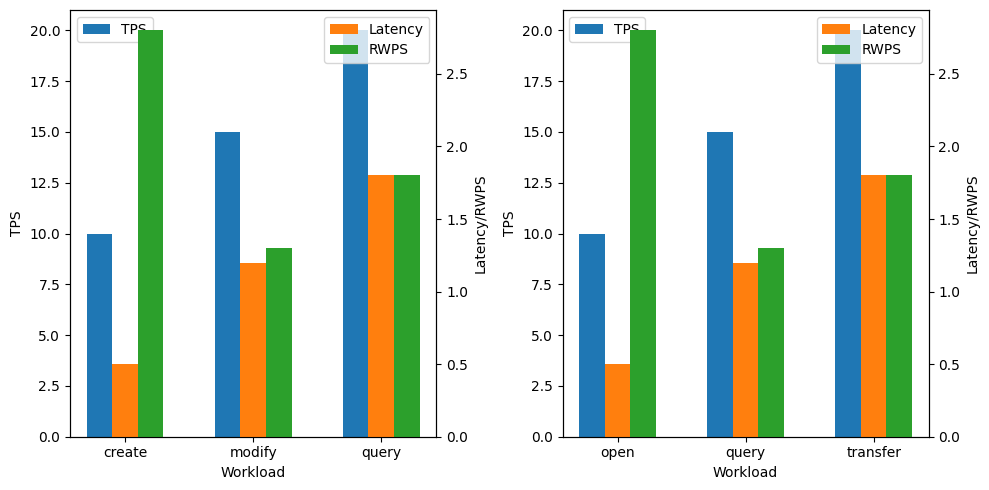

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# 枚举 abc
categories1 = ['create', 'modify', 'query']
categories2 = ['open', 'query', 'transfer']
x = np.arange(len(categories1))  # 生成 x 轴坐标

# 模拟数据
xgboost = [10, 15, 20]  # XGBoost 数据
svr1 = [0.5, 1.2, 1.8]   # SVR1 数据
svr2 = [2.8, 1.3, 1.8]   # SVR2 数据

width = 0.2  # 柱状图宽度

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.bar(x - width, xgboost, width, label='TPS')
ax12 = ax1.twinx()
ax12.bar(x, svr1, width, label='Latency', color='#ff7f0e')
ax12.bar(x + width, svr2, width, label='RWPS', color='#2ca02c')
ax12.set_ylabel('Latency/RWPS')
ax1.set_xlabel('Workload')
ax1.set_ylabel('TPS')
ax1.set_xticks(x)
ax1.set_xticklabels(categories1)
ax1.legend()
ax12.legend()

ax2.bar(x - width, xgboost, width, label='TPS')
ax22 = ax2.twinx()
ax22.bar(x, svr1, width, label='Latency', color='#ff7f0e')
ax22.bar(x + width, svr2, width, label='RWPS', color='#2ca02c')
ax22.set_ylabel('Latency/RWPS')
ax2.set_xlabel('Workload')
ax2.set_ylabel('TPS')
ax2.set_xticks(x)
ax2.set_xticklabels(categories2)
ax2.legend()
ax22.legend()
plt.tight_layout()

plt.show()


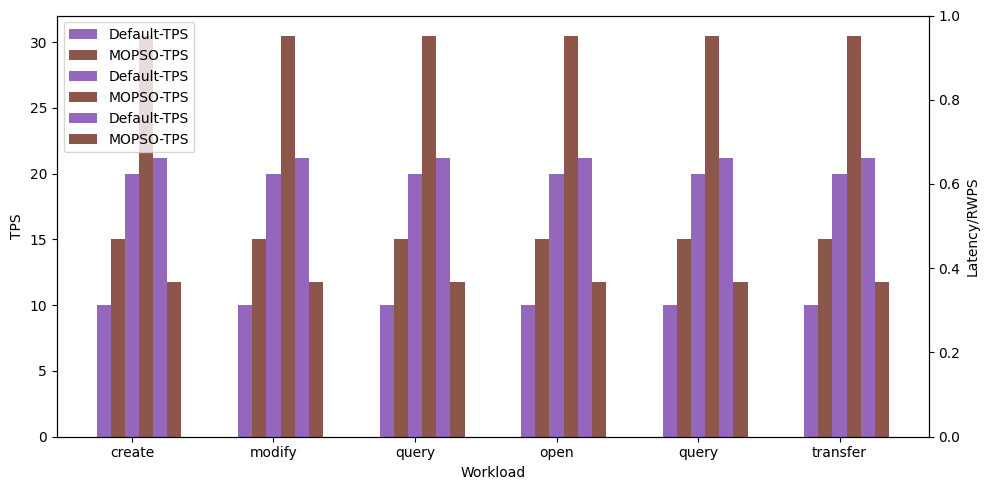

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# 枚举 abc
categories = ['create', 'modify', 'query', 'open', 'query', 'transfer']
x = np.arange(len(categories))  # 生成 x 轴坐标

# 模拟数据
data = [
    (10, 0.5, 2.8, 'Default-TPS', 'Default-Latency', 'Default-RWPS', '#9467bd'),
    (15, 1.2, 1.3, 'MOPSO-TPS', 'MOPSO-Latency', 'MOPSO-RWPS', '#8c564b'),
    (20, 1.8, 1.8, 'Default-TPS', 'Default-Latency', 'Default-RWPS', '#9467bd'),
    (30.5, 0.5, 0.5, 'MOPSO-TPS', 'MOPSO-Latency', 'MOPSO-RWPS', '#8c564b'),
    (21.2, 1.2, 1.2, 'Default-TPS', 'Default-Latency', 'Default-RWPS', '#9467bd'),
    (11.8, 1.8, 1.8, 'MOPSO-TPS', 'MOPSO-Latency', 'MOPSO-RWPS', '#8c564b'),
]

width = 0.1  # 柱状图宽度

fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))

plots = []
for i, (tps, latency, rwps, label_tps, label_latency, label_rwps, color) in enumerate(data):
    plots.extend([
        ax1.bar(x - 2*width + i*width, tps, width, label=label_tps, color=color),
        ax1.bar(x - width + i*width, latency, width, label=label_latency, color=color),
        ax1.bar(x + i*width, rwps, width, label=label_rwps, color=color),
    ])

ax2 = ax1.twinx()
ax2.set_ylabel('Latency/RWPS')
ax1.set_xlabel('Workload')
ax1.set_ylabel('TPS')
ax1.set_xticks(x)
ax1.set_xticklabels(categories)

# 合并图例
labels = [plot.get_label() for plot in plots]
ax1.legend(plots, labels, loc='upper left')

plt.tight_layout()
plt.show()


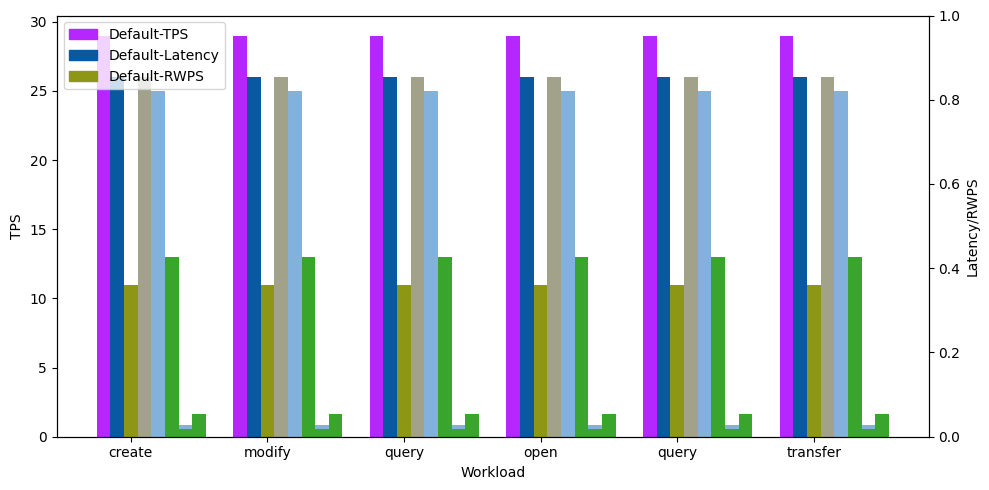

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# 枚举 abc
categories = ['create', 'modify', 'query', 'open', 'query', 'transfer']
x = np.arange(len(categories))  # 生成 x 轴坐标

# 生成随机数据
  # 设置随机种子以确保结果可重复
data = [
    (np.random.randint(10, 30), np.random.uniform(0.5, 2.0), np.random.uniform(0.5, 2.8), np.random.rand(3)) for _ in range(6)
]

width = 0.1  # 柱状图宽度

fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))

plots = []
for i, (tps, latency, rwps, color) in enumerate(data):
    plots.extend([
        ax1.bar(x - 2*width + i*width, tps, width, color=color),
        ax1.bar(x - width + i*width, latency, width, color=color),
        ax1.bar(x + i*width, rwps, width, color=color),
    ])

ax2 = ax1.twinx()
ax2.set_ylabel('Latency/RWPS')
ax1.set_xlabel('Workload')
ax1.set_ylabel('TPS')
ax1.set_xticks(x)
ax1.set_xticklabels(categories)

# 创建自定义图例
labels = ['Default-TPS', 'Default-Latency', 'Default-RWPS']
custom_legend = [plt.Rectangle((0, 0), 1, 1, color=data[i][3], label=labels[i % len(labels)]) for i in range(len(data))]
ax1.legend(custom_legend, labels, loc='upper left')

plt.tight_layout()
plt.show()


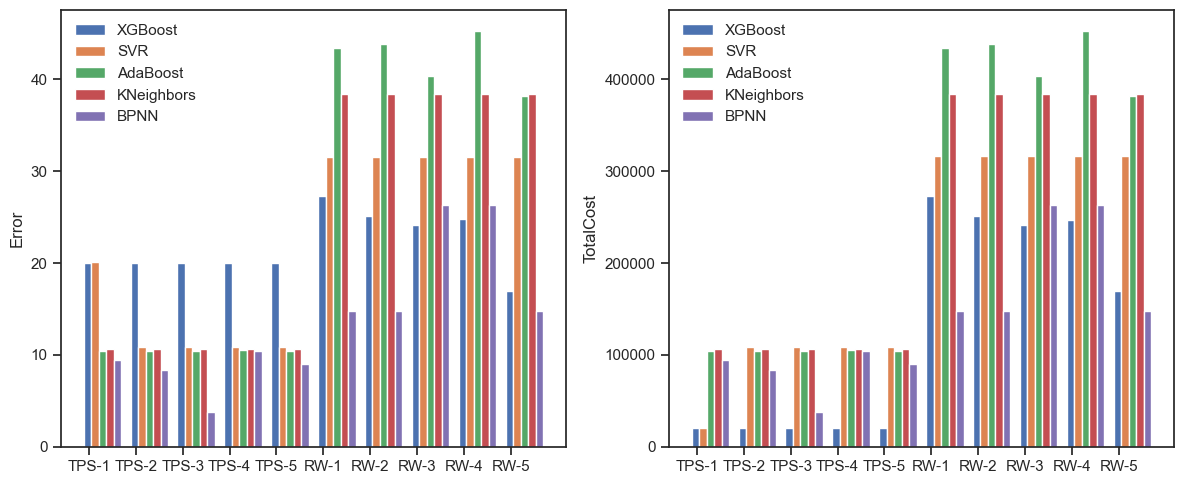

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# First set of data (Error values)
list1 = np.array([20.06, 20.06, 20.06, 20.06, 20.06, 27.34, 25.14, 24.10, 24.76, 16.94])
list2 = np.array([20.16, 10.89, 10.89, 10.89, 10.89, 31.61, 31.61, 31.61, 31.61, 31.61])
list3 = np.array([10.41, 10.44, 10.40, 10.55, 10.41, 43.43, 43.82, 40.33, 45.30, 38.25])
list4 = np.array([10.67, 10.67, 10.67, 10.67, 10.67, 38.42, 38.42, 38.42, 38.42, 38.42])
list5 = np.array([9.48, 8.38, 3.78, 10.46, 9.02, 14.84, 14.84, 26.35, 26.35, 14.84])

# Second set of data (TotalCost values)
list1_tc = np.array([20300.0, 20300.0, 20300.0, 20300.0, 20300.0, 273494.0, 251494.0, 241494.0, 247494.0, 169494.0])
list2_tc = np.array([20500.0, 108900.0, 108900.0, 108900.0, 108900.0, 316161.0, 316161.0, 316161.0, 316161.0, 316161.0])
list3_tc = np.array([104100.0, 104400.0, 104000.0, 105500.0, 104100.0, 434343.0, 438200.0, 403300.0, 453000.0, 382500.0])
list4_tc = np.array([106700.0, 106700.0, 106700.0, 106700.0, 106700.0, 384200.0, 384200.0, 384200.0, 384200.0, 384200.0])
list5_tc = np.array([94800.0, 83800.0, 37800.0, 104600.0, 90200.0, 148400.0, 148400.0, 263500.0, 263500.0, 148400.0])

# Calculate means
mean_list1 = list1.mean()
mean_list2 = list2.mean()
mean_list3 = list3.mean()
mean_list4 = list4.mean()
mean_list5 = list5.mean()

mean_list1_tc = list1_tc.mean()
mean_list2_tc = list2_tc.mean()
mean_list3_tc = list3_tc.mean()
mean_list4_tc = list4_tc.mean()
mean_list5_tc = list5_tc.mean()

length = len(list1)
x = np.arange(length)
listCol = ['TPS-1', 'TPS-2', 'TPS-3', 'TPS-4', 'TPS-5', 'RW-1', 'RW-2', 'RW-3', 'RW-4', 'RW-5']

# Create a figure with two subplots
sns.set(style='ticks')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first subplot (Error values)
total_width, n = 0.8, 5
width = total_width / n
x1 = x - width / n
x2 = x1 + width
x3 = x2 + width
x4 = x3 + width
x5 = x4 + width
ax1.set_ylabel('Error')
ax1.bar(x1, list1, width, label='XGBoost')
ax1.bar(x2, list2, width, label='SVR')
ax1.bar(x3, list3, width, label='AdaBoost')
ax1.bar(x4, list4, width, label='KNeighbors')
ax1.bar(x5, list5, width, label='BPNN')
ax1.set_xticks(x)
ax1.set_xticklabels(listCol)
ax1.legend(ncol=1)

# Plot the second subplot (TotalCost values)
total_width, n = 0.8, 5
width = total_width / n
x1 = x - width / n
x2 = x1 + width
x3 = x2 + width
x4 = x3 + width
x5 = x4 + width
ax2.set_ylabel('TotalCost')
ax2.bar(x1, list1_tc, width, label='XGBoost')
ax2.bar(x2, list2_tc, width, label='SVR')
ax2.bar(x3, list3_tc, width, label='AdaBoost')
ax2.bar(x4, list4_tc, width, label='KNeighbors')
ax2.bar(x5, list5_tc, width, label='BPNN')
ax2.set_xticks(x)
ax2.set_xticklabels(listCol)
ax2.legend(ncol=1)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


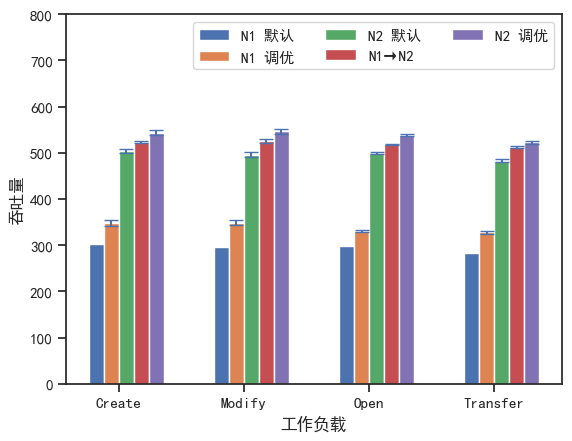

In [57]:
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.rcParams['font.sans-serif'] = ['KaiTi']
import seaborn as sns
sns.set(style='ticks')
plt.rcParams['font.sans-serif'] = 'SimHei'
# 您提供的数据（示例数据，请替换为实际的数值）
x_labels = ['Create', 'Modify', 'Open', 'Transfer']
y_default = [303.5, 296.2, 298.8, 283.0]  # 请替换为实际的默认值
# 303.5 296.2 1812.4 298.8 1826.6 283.0
y_bayesian = [503.5, 496.2, 498.8, 483.0]  # 请替换为实际的贝叶斯值
#  317.97 308.85 1863.41 341.17 1889.81 327.51
y_aspsa = [347.97, 348.85, 331.17, 327.51]  # 请替换为实际的ASPSA值
y_simulated_annealing = [543.5, 546.2, 538.8, 523.0]  # 请替换为实际的模拟退火值
y_aspsa1 = [523.5, 526.2, 518.8, 513.0]

plt.figure()
plt.ylim((0, 800))
bar_width = 0.12
index = range(len(x_labels))
plt.bar(index, y_default, width=bar_width, label='N1 默认')
plt.bar([i + 1 * bar_width for i in index], y_aspsa, width=bar_width, label='N1 调优')
plt.bar([i + 2 * bar_width for i in index], y_bayesian, width=bar_width, label='N2 默认')
plt.bar([i + 3 * bar_width for i in index], y_aspsa1, width=bar_width, label='N1→N2')
plt.bar([i + 4 * bar_width for i in index], y_simulated_annealing, width=bar_width, label='N2 调优')


error_bar_default = [5, 6, 3, 4]  # 请替换为实际的误差值
error_bar_bayesian = [4, 5, 2, 3]  # 请替换为实际的误差值
error_bar_aspsa = [3, 4, 1, 2]  # 请替换为实际的误差值
error_bar_simulated_annealing = [6, 5, 2, 3]  # 请替换为实际的误差值
error_bar_simulated_annealing1 = [6, 5, 2, 3]  # 请替换为实际的误差值
plt.errorbar([i + 2 * bar_width for i in index], y_bayesian, yerr=error_bar_bayesian, fmt='none', capsize=5, label='_error_bayesian')
plt.errorbar([i + 3 * bar_width for i in index], y_aspsa1, yerr=error_bar_aspsa, fmt='none', capsize=5, label='_error_aspsa')
plt.errorbar([i + 1 * bar_width for i in index], y_aspsa, yerr=error_bar_simulated_annealing1, fmt='none', capsize=5, label='_error_aspsa')
plt.errorbar([i + 4 * bar_width for i in index], y_simulated_annealing, yerr=error_bar_simulated_annealing, fmt='none', capsize=5, label='_error_simulated_annealing')

plt.xlabel('工作负载')
plt.ylabel('吞吐量')
plt.xticks([i + 1.5 * bar_width for i in index], x_labels)
plt.legend(ncol=3, loc='upper right')

# 显示图形
plt.show()


In [58]:
# 计算变化百分比
percentage_changes = [((aspsa - default) / default) * 100 for default, aspsa in zip(y_default, y_aspsa)]
sum_p = 0
# 打印结果
for i, percentage_change in enumerate(percentage_changes):
    print(f"第{i + 1}个位置的变化百分比: {percentage_change:.2f}%")
    sum_p += percentage_change
print(sum_p/len(percentage_changes))
percentage_changes = [((aspsa - default) / default) * 100 for default, aspsa in zip(y_bayesian, y_aspsa1)]
sum_p = 0
# 打印结果
for i, percentage_change in enumerate(percentage_changes):
    print(f"第{i + 1}个位置的变化百分比: {percentage_change:.2f}%")
    sum_p += percentage_change
print(sum_p / len(percentage_changes))
# 计算变化百分比
percentage_changes = [((aspsa - default) / default) * 100 for default, aspsa in zip(y_simulated_annealing, y_bayesian)]
sum_p = 0
# 打印结果
for i, percentage_change in enumerate(percentage_changes):
    print(f"第{i + 1}个位置的变化百分比: {percentage_change:.2f}%")
    sum_p += percentage_change
print(sum_p / len(percentage_changes))

第1个位置的变化百分比: 14.65%
第2个位置的变化百分比: 17.78%
第3个位置的变化百分比: 10.83%
第4个位置的变化百分比: 15.73%
14.747197312354789
第1个位置的变化百分比: 3.97%
第2个位置的变化百分比: 6.05%
第3个位置的变化百分比: 4.01%
第4个位置的变化百分比: 6.21%
5.059736767804118
第1个位置的变化百分比: -7.36%
第2个位置的变化百分比: -9.15%
第3个位置的变化百分比: -7.42%
第4个位置的变化百分比: -7.65%
-7.896487532253807


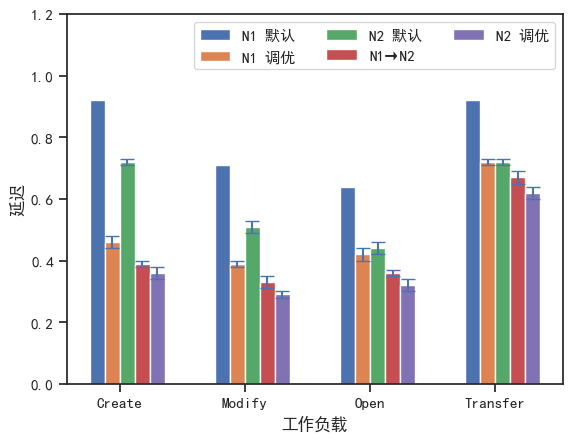

In [24]:
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.rcParams['font.sans-serif'] = ['KaiTi']
import seaborn as sns
sns.set(style='ticks')
plt.rcParams['font.sans-serif'] = 'SimHei'
# 您提供的数据（示例数据，请替换为实际的数值）
x_labels = ['Create', 'Modify', 'Open', 'Transfer']
y_default = [0.92, 0.71, 0.64, 0.92]  # 请替换为实际的默认值
# 0.92 0.71 0.05 0.64 0.05 0.92
y_bayesian = [0.72, 0.51, 0.44, 0.72]  # 请替换为实际的贝叶斯值
# 0.46 0.39 0.04 0.42 0.04 0.78
# 0.44 0.32 0.04 0.37 0.04 0.68
y_aspsa = [0.46, 0.39, 0.42, 0.72]  # 请替换为实际的ASPSA值
y_aspsa1 = [0.39, 0.33, 0.36, 0.67]  # 请替换为实际的ASPSA值
y_simulated_annealing = [0.36, 0.29, 0.32, 0.62]  # 请替换为实际的模拟退火值

plt.figure()
plt.ylim((0, 1.2))
bar_width = 0.12
index = range(len(x_labels))
plt.bar(index, y_default, width=bar_width, label='N1 默认')
plt.bar([i + 1 * bar_width for i in index], y_aspsa, width=bar_width, label='N1 调优')
plt.bar([i + 2 * bar_width for i in index], y_bayesian, width=bar_width, label='N2 默认')
plt.bar([i + 3 * bar_width for i in index], y_aspsa1, width=bar_width, label='N1→N2')
plt.bar([i + 4 * bar_width for i in index], y_simulated_annealing, width=bar_width, label='N2 调优')

error_bar_bayesian = [0.01, 0.02, 0.02, 0.01]  # 请替换为实际的误差值
error_bar_aspsa = [0.01, 0.02, 0.01, 0.02]  # 请替换为实际的误差值
error_bar_simulated_annealing = [0.02, 0.01, 0.02, 0.02]  # 请替换为实际的误差值
error_bar_simulated_annealing1 = [0.02, 0.01, 0.02, 0.01]  # 请替换为实际的误差值
plt.errorbar([i + 2 * bar_width for i in index], y_bayesian, yerr=error_bar_bayesian, fmt='none', capsize=5, label='_error_bayesian')
plt.errorbar([i + 3 * bar_width for i in index], y_aspsa1, yerr=error_bar_aspsa, fmt='none', capsize=5, label='_error_aspsa')
plt.errorbar([i + 1 * bar_width for i in index], y_aspsa, yerr=error_bar_simulated_annealing1, fmt='none', capsize=5, label='_error_aspsa')
plt.errorbar([i + 4 * bar_width for i in index], y_simulated_annealing, yerr=error_bar_simulated_annealing, fmt='none', capsize=5, label='_error_simulated_annealing')

plt.xlabel('工作负载')
plt.ylabel('延迟')
plt.xticks([i + 1.5 * bar_width for i in index], x_labels)
plt.legend(ncol=3, loc='upper right')

# 显示图形
plt.show()

In [48]:
# 计算变化百分比
percentage_changes = [((aspsa - default) / default) * 100 for default, aspsa in zip(y_default, y_aspsa)]
sum_p = 0
# 打印结果
for i, percentage_change in enumerate(percentage_changes):
    print(f"第{i + 1}个位置的变化百分比: {percentage_change:.2f}%")
    sum_p += percentage_change
print(sum_p/len(percentage_changes))
percentage_changes = [((aspsa - default) / default) * 100 for default, aspsa in zip(y_bayesian, y_aspsa1)]
sum_p = 0
# 打印结果
for i, percentage_change in enumerate(percentage_changes):
    print(f"第{i + 1}个位置的变化百分比: {percentage_change:.2f}%")
    sum_p += percentage_change
print(sum_p / len(percentage_changes))
# 计算变化百分比
percentage_changes = [((aspsa - default) / default) * 100 for default, aspsa in zip(y_simulated_annealing, y_bayesian)]
sum_p = 0
# 打印结果
for i, percentage_change in enumerate(percentage_changes):
    print(f"第{i + 1}个位置的变化百分比: {percentage_change:.2f}%")
    sum_p += percentage_change
print(sum_p / len(percentage_changes))

第1个位置的变化百分比: -50.00%
第2个位置的变化百分比: -45.07%
第3个位置的变化百分比: -34.38%
第4个位置的变化百分比: -21.74%
-37.79613824249847
第1个位置的变化百分比: -45.83%
第2个位置的变化百分比: -35.29%
第3个位置的变化百分比: -18.18%
第4个位置的变化百分比: -6.94%
-26.563428401663693
第1个位置的变化百分比: 100.00%
第2个位置的变化百分比: 75.86%
第3个位置的变化百分比: 37.50%
第4个位置的变化百分比: 16.13%
57.372775305895445


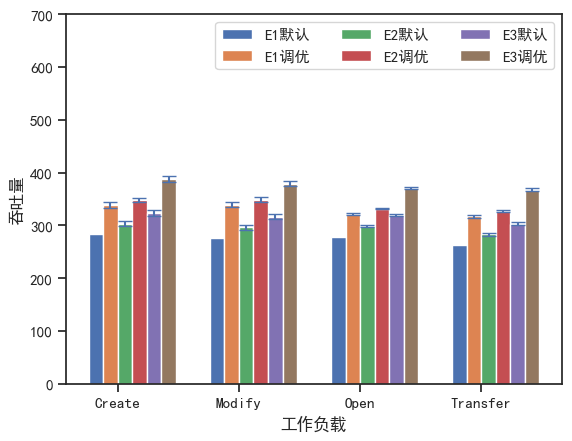

In [40]:
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.rcParams['font.sans-serif'] = ['KaiTi']
import seaborn as sns
sns.set(style='ticks')
plt.rcParams['font.sans-serif'] = 'SimHei'
# 您提供的数据（示例数据，请替换为实际的数值）
x_labels = ['Create', 'Modify', 'Open', 'Transfer']
y_default = [283.5, 276.2, 278.8, 263.0]  # 请替换为实际的默认值
# 303.5 296.2 1812.4 298.8 1826.6 283.0
y_bayesian = [303.5, 296.2, 298.8, 283.0]  # 请替换为实际的贝叶斯值
#  317.97 308.85 1863.41 341.17 1889.81 327.51
y_aspsa = [337.97, 338.85, 321.17, 317.51]  # 请替换为实际的ASPSA值
y_simulated_annealing = [323.5, 316.2, 318.8, 303.0]  # 请替换为实际的模拟退火值
y_aspsa1 = [347.97, 348.85, 331.17, 327.51]
y_aspsa2 = [387.97, 378.85, 371.17, 367.51]
plt.figure()
plt.ylim((0, 700))
bar_width = 0.12
index = range(len(x_labels))
plt.bar(index, y_default, width=bar_width, label='E1默认')
plt.bar([i + 1 * bar_width for i in index], y_aspsa, width=bar_width, label='E1调优')
plt.bar([i + 2 * bar_width for i in index], y_bayesian, width=bar_width, label='E2默认')
plt.bar([i + 3 * bar_width for i in index], y_aspsa1, width=bar_width, label='E2调优')
plt.bar([i + 4 * bar_width for i in index], y_simulated_annealing, width=bar_width, label='E3默认')
plt.bar([i + 5 * bar_width for i in index], y_aspsa2, width=bar_width, label='E3调优')

error_bar_bayesian = [4, 5, 2, 3]  # 请替换为实际的误差值
error_bar_aspsa = [3, 4, 1, 2]  # 请替换为实际的误差值
error_bar_simulated_annealing = [6, 5, 2, 3]  # 请替换为实际的误差值
error_bar_simulated_annealing1 = [6, 5, 2, 3]  # 请替换为实际的误差值
plt.errorbar([i + 2 * bar_width for i in index], y_bayesian, yerr=error_bar_bayesian, fmt='none', capsize=5, label='_error_bayesian')
plt.errorbar([i + 3 * bar_width for i in index], y_aspsa1, yerr=error_bar_aspsa, fmt='none', capsize=5, label='_error_aspsa')
plt.errorbar([i + 1 * bar_width for i in index], y_aspsa, yerr=error_bar_simulated_annealing1, fmt='none', capsize=5, label='_error_aspsa')
plt.errorbar([i + 4 * bar_width for i in index], y_simulated_annealing, yerr=error_bar_simulated_annealing, fmt='none', capsize=5, label='_error_simulated_annealing')
plt.errorbar([i + 5 * bar_width for i in index], y_aspsa2, yerr=error_bar_simulated_annealing, fmt='none', capsize=5, label='_error_simulated_annealing')

plt.xlabel('工作负载')
plt.ylabel('吞吐量')
plt.xticks([i + 1.5 * bar_width for i in index], x_labels)
plt.legend(ncol=3, loc='upper right')

# 显示图形
plt.show()

In [43]:
# 计算变化百分比
percentage_changes = [((aspsa - default) / default) * 100 for default, aspsa in zip(y_default, y_aspsa)]
sum_p = 0
# 打印结果
for i, percentage_change in enumerate(percentage_changes):
    print(f"第{i + 1}个位置的变化百分比: {percentage_change:.2f}%")
    sum_p += percentage_change
print(sum_p/len(percentage_changes))
percentage_changes = [((aspsa - default) / default) * 100 for default, aspsa in zip(y_bayesian, y_aspsa1)]
sum_p = 0
# 打印结果
for i, percentage_change in enumerate(percentage_changes):
    print(f"第{i + 1}个位置的变化百分比: {percentage_change:.2f}%")
    sum_p += percentage_change
print(sum_p / len(percentage_changes))
# 计算变化百分比
percentage_changes = [((aspsa - default) / default) * 100 for default, aspsa in zip(y_simulated_annealing, y_aspsa2)]
sum_p = 0
# 打印结果
for i, percentage_change in enumerate(percentage_changes):
    print(f"第{i + 1}个位置的变化百分比: {percentage_change:.2f}%")
    sum_p += percentage_change
print(sum_p / len(percentage_changes))

第1个位置的变化百分比: 19.21%
第2个位置的变化百分比: 22.68%
第3个位置的变化百分比: 15.20%
第4个位置的变化百分比: 20.73%
19.45493804397221
第1个位置的变化百分比: 14.65%
第2个位置的变化百分比: 17.78%
第3个位置的变化百分比: 10.83%
第4个位置的变化百分比: 15.73%
14.747197312354789
第1个位置的变化百分比: 19.93%
第2个位置的变化百分比: 19.81%
第3个位置的变化百分比: 16.43%
第4个位置的变化百分比: 21.29%
19.36499200167716


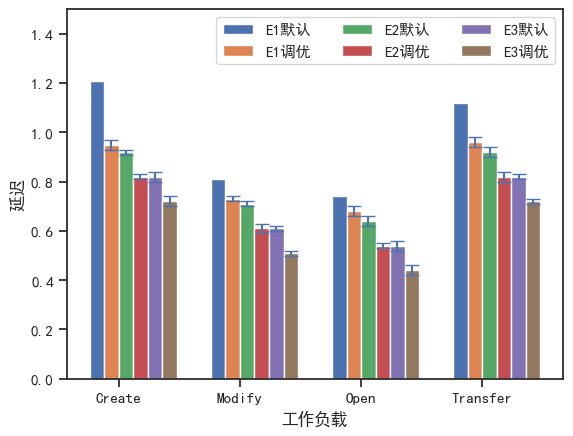

In [28]:
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.rcParams['font.sans-serif'] = ['KaiTi']
import seaborn as sns
sns.set(style='ticks')
plt.rcParams['font.sans-serif'] = 'SimHei'
x_labels = ['Create', 'Modify', 'Open', 'Transfer']
y_default = [1.21, 0.81, 0.74, 1.12]
y_bayesian = [0.92, 0.71, 0.64, 0.92]
y_aspsa = [0.95, 0.73, 0.68, 0.96]  # 请替换为实际的ASPSA值
y_aspsa1 = [0.82, 0.61, 0.54, 0.82]  # 请替换为实际的ASPSA值
y_simulated_annealing = [0.82, 0.61, 0.54, 0.82]  # 请替换为实际的模拟退火值
y_aspsa2 = [0.72, 0.51, 0.44, 0.72]
plt.figure()
plt.ylim((0, 1.5))
bar_width = 0.12
index = range(len(x_labels))
plt.bar(index, y_default, width=bar_width, label='E1默认')
plt.bar([i + 1 * bar_width for i in index], y_aspsa, width=bar_width, label='E1调优')
plt.bar([i + 2 * bar_width for i in index], y_bayesian, width=bar_width, label='E2默认')
plt.bar([i + 3 * bar_width for i in index], y_aspsa1, width=bar_width, label='E2调优')
plt.bar([i + 4 * bar_width for i in index], y_simulated_annealing, width=bar_width, label='E3默认')
plt.bar([i + 5 * bar_width for i in index], y_aspsa2, width=bar_width, label='E3调优')

error_bar_bayesian = [0.01, 0.01, 0.02, 0.02]  # 请替换为实际的误差值
error_bar_aspsa = [0.01, 0.02, 0.01, 0.02]  # 请替换为实际的误差值
error_bar_simulated_annealing = [0.02, 0.01, 0.02, 0.01]  # 请替换为实际的误差值
error_bar_simulated_annealing1 = [0.02, 0.01, 0.02, 0.02]  # 请替换为实际的误差值
plt.errorbar([i + 2 * bar_width for i in index], y_bayesian, yerr=error_bar_bayesian, fmt='none', capsize=5, label='_error_bayesian')
plt.errorbar([i + 3 * bar_width for i in index], y_aspsa1, yerr=error_bar_aspsa, fmt='none', capsize=5, label='_error_aspsa')
plt.errorbar([i + 1 * bar_width for i in index], y_aspsa, yerr=error_bar_simulated_annealing1, fmt='none', capsize=5, label='_error_aspsa')
plt.errorbar([i + 4 * bar_width for i in index], y_simulated_annealing, yerr=error_bar_simulated_annealing, fmt='none', capsize=5, label='_error_simulated_annealing')
plt.errorbar([i + 5 * bar_width for i in index], y_aspsa2, yerr=error_bar_simulated_annealing, fmt='none', capsize=5, label='_error_simulated_annealing')

plt.xlabel('工作负载')
plt.ylabel('延迟')
plt.xticks([i + 1.5 * bar_width for i in index], x_labels)
plt.legend(ncol=3, loc='upper right')

# 显示图形
plt.show()

In [37]:
# 计算变化百分比
percentage_changes = [((aspsa - default) / default) * 100 for default, aspsa in zip(y_default, y_aspsa)]
sum_p = 0
# 打印结果
for i, percentage_change in enumerate(percentage_changes):
    print(f"第{i + 1}个位置的变化百分比: {percentage_change:.2f}%")
    sum_p += percentage_change
print(sum_p/len(percentage_changes))

第1个位置的变化百分比: -12.35%
第2个位置的变化百分比: -11.90%
第3个位置的变化百分比: -11.49%
第4个位置的变化百分比: -10.87%
第5个位置的变化百分比: -12.50%
第6个位置的变化百分比: -11.61%
-11.786900310867496


In [38]:
# 计算变化百分比
percentage_changes = [((aspsa - default) / default) * 100 for default, aspsa in zip(y_bayesian, y_aspsa1)]
sum_p = 0
# 打印结果
for i, percentage_change in enumerate(percentage_changes):
    print(f"第{i + 1}个位置的变化百分比: {percentage_change:.2f}%")
    sum_p += percentage_change
print(sum_p/len(percentage_changes))

第1个位置的变化百分比: -10.87%
第2个位置的变化百分比: -14.08%
第3个位置的变化百分比: -15.62%
第4个位置的变化百分比: -10.87%
-12.862159369259036


In [39]:
# 计算变化百分比
percentage_changes = [((aspsa - default) / default) * 100 for default, aspsa in zip(y_simulated_annealing, y_aspsa2)]
sum_p = 0
# 打印结果
for i, percentage_change in enumerate(percentage_changes):
    print(f"第{i + 1}个位置的变化百分比: {percentage_change:.2f}%")
    sum_p += percentage_change
print(sum_p/len(percentage_changes))

第1个位置的变化百分比: -12.20%
第2个位置的变化百分比: -16.39%
第3个位置的变化百分比: -18.52%
第4个位置的变化百分比: -12.20%
-14.825551260977091


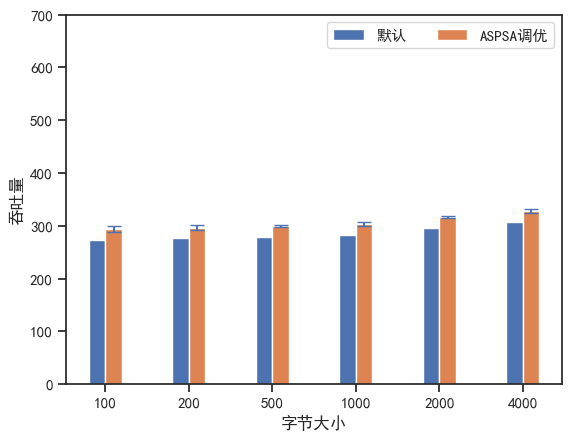

In [19]:
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.rcParams['font.sans-serif'] = ['KaiTi']
import seaborn as sns
sns.set(style='ticks')
plt.rcParams['font.sans-serif'] = 'SimHei'
x_labels = ['100', '200', '500', '1000', '2000', '4000']
y_default = [273.5, 276.2, 278.8, 283.2, 295.8, 308.0]  # 请替换为实际的默认值
y_bayesian = [303.5, 296.2, 298.8, 283.0]  # 请替换为实际的贝叶斯值
y_aspsa = [293.5, 296.2, 298.8, 303.2, 315.8, 328.0]  # 请替换为实际的ASPSA值
y_simulated_annealing = [323.5, 316.2, 318.8, 303.0]  # 请替换为实际的模拟退火值
y_aspsa1 = [347.97, 348.85, 331.17, 327.51]
y_aspsa2 = [387.97, 378.85, 371.17, 367.51]
plt.figure()
plt.ylim((0, 700))
bar_width = 0.2
index = range(len(x_labels))
plt.bar(index, y_default, width=bar_width, label='默认')
plt.bar([i + 1 * bar_width for i in index], y_aspsa, width=bar_width, label='ASPSA调优')
error_bar_bayesian = [4, 5, 2, 3]  # 请替换为实际的误差值
error_bar_aspsa = [3, 4, 1, 2]  # 请替换为实际的误差值
error_bar_simulated_annealing = [6, 5, 2, 3]  # 请替换为实际的误差值
error_bar_simulated_annealing1 = [6, 5, 2, 3, 2, 3]
plt.errorbar([i + 1 * bar_width for i in index], y_aspsa, yerr=error_bar_simulated_annealing1, fmt='none', capsize=5, label='_error_aspsa')
plt.xlabel('字节大小')
plt.ylabel('吞吐量')
plt.xticks([i + 0.5 * bar_width for i in index], x_labels)
plt.legend(ncol=3, loc='upper right')
plt.show()

In [20]:
# 计算变化百分比
percentage_changes = [((aspsa - default) / default) * 100 for default, aspsa in zip(y_default, y_aspsa)]

# 打印结果
for i, percentage_change in enumerate(percentage_changes):
    print(f"第{i + 1}个位置的变化百分比: {percentage_change:.2f}%")

第1个位置的变化百分比: 7.31%
第2个位置的变化百分比: 7.24%
第3个位置的变化百分比: 7.17%
第4个位置的变化百分比: 7.06%
第5个位置的变化百分比: 6.76%
第6个位置的变化百分比: 6.49%


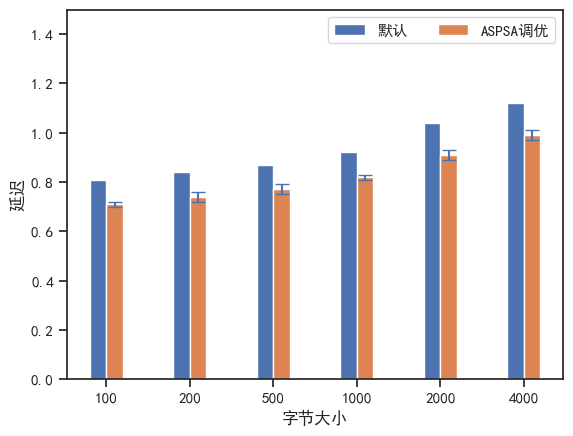

In [30]:
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.rcParams['font.sans-serif'] = ['KaiTi']
import seaborn as sns
sns.set(style='ticks')
plt.rcParams['font.sans-serif'] = 'SimHei'
x_labels = ['100', '200', '500', '1000', '2000', '4000']
y_default = [0.81, 0.84, 0.87, 0.92, 1.04, 1.12]
y_aspsa = [0.71, 0.74, 0.77, 0.82, 0.91, 0.99]
plt.figure()
plt.ylim((0, 1.5))
bar_width = 0.2
index = range(len(x_labels))
plt.bar(index, y_default, width=bar_width, label='默认')
plt.bar([i + 1 * bar_width for i in index], y_aspsa, width=bar_width, label='ASPSA调优')
error_bar_simulated_annealing1 = [0.01, 0.02, 0.02, 0.01, 0.02, 0.02]
plt.errorbar([i + 1 * bar_width for i in index], y_aspsa, yerr=error_bar_simulated_annealing1, fmt='none', capsize=5, label='_error_aspsa')
plt.xlabel('字节大小')
plt.ylabel('延迟')
plt.xticks([i + 0.5 * bar_width for i in index], x_labels)
plt.legend(ncol=3, loc='upper right')
plt.show()

In [36]:
# 计算变化百分比
percentage_changes = [((aspsa - default) / default) * 100 for default, aspsa in zip(y_default, y_aspsa)]

# 打印结果
for i, percentage_change in enumerate(percentage_changes):
    print(f"第{i + 1}个位置的变化百分比: {percentage_change:.2f}%")

第1个位置的变化百分比: -12.35%
第2个位置的变化百分比: -11.90%
第3个位置的变化百分比: -11.49%
第4个位置的变化百分比: -10.87%
第5个位置的变化百分比: -12.50%
第6个位置的变化百分比: -11.61%


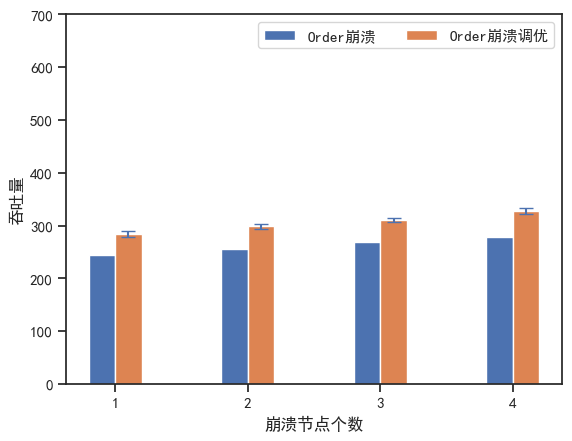

In [84]:
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.rcParams['font.sans-serif'] = ['KaiTi']
import seaborn as sns
sns.set(style='ticks')
plt.rcParams['font.sans-serif'] = 'SimHei'
# 您提供的数据（示例数据，请替换为实际的数值）
x_labels = ['1', '2', '3', '4']
y_default = [243.5, 256.2, 268.8, 278.8]  # 请替换为实际的默认值
# 303.5 296.2 1812.4 298.8 1826.6 283.0
y_bayesian = [303.5, 296.2, 298.8]  # 请替换为实际的贝叶斯值
#  317.97 308.85 1863.41 341.17 1889.81 327.51
y_aspsa = [283.97, 298.85, 311.17, 327.8]  # 请替换为实际的ASPSA值
y_simulated_annealing = [323.5, 316.2, 318.8]  # 请替换为实际的模拟退火值
y_aspsa1 = [347.97, 348.85, 331.17]
y_aspsa2 = [387.97, 378.85, 371.17]
plt.figure()
plt.ylim((0, 700))
bar_width = 0.2
index = range(len(x_labels))
plt.bar(index, y_default, width=bar_width, label='Order崩溃')
plt.bar([i + 1 * bar_width for i in index], y_aspsa, width=bar_width, label='Order崩溃调优')
# plt.bar([i + 2 * bar_width for i in index], y_bayesian, width=bar_width, label='Order崩溃')
# plt.bar([i + 3 * bar_width for i in index], y_aspsa1, width=bar_width, label='Order崩溃调优')
# plt.bar([i + 4 * bar_width for i in index], y_simulated_annealing, width=bar_width, label='E3默认')
# plt.bar([i + 5 * bar_width for i in index], y_aspsa2, width=bar_width, label='E3调优')

error_bar_bayesian = [4, 5, 2]  # 请替换为实际的误差值
error_bar_aspsa = [3, 4, 1]  # 请替换为实际的误差值
error_bar_simulated_annealing = [6, 5, 4, 5]  # 请替换为实际的误差值
error_bar_simulated_annealing1 = [6, 5, 4, 5]  # 请替换为实际的误差值
# plt.errorbar([i + 2 * bar_width for i in index], y_bayesian, yerr=error_bar_bayesian, fmt='none', capsize=5, label='_error_bayesian')
# plt.errorbar([i + 3 * bar_width for i in index], y_aspsa1, yerr=error_bar_aspsa, fmt='none', capsize=5, label='_error_aspsa')
plt.errorbar([i + 1 * bar_width for i in index], y_aspsa, yerr=error_bar_simulated_annealing1, fmt='none', capsize=5, label='_error_aspsa')
# plt.errorbar([i + 4 * bar_width for i in index], y_simulated_annealing, yerr=error_bar_simulated_annealing, fmt='none', capsize=5, label='_error_simulated_annealing')
# plt.errorbar([i + 5 * bar_width for i in index], y_aspsa2, yerr=error_bar_simulated_annealing, fmt='none', capsize=5, label='_error_simulated_annealing')

plt.xlabel('崩溃节点个数')
plt.ylabel('吞吐量')
plt.xticks([i + 0.5 * bar_width for i in index], x_labels)
plt.legend(ncol=2, loc='upper right')
plt.show()

In [77]:
# 计算变化百分比
percentage_changes = [((aspsa - default) / default) * 100 for default, aspsa in zip(y_default, y_aspsa)]
sum_p = 0
# 打印结果
for i, percentage_change in enumerate(percentage_changes):
    print(f"第{i + 1}个位置的变化百分比: {percentage_change:.2f}%")
    sum_p += percentage_change
print(sum_p/len(percentage_changes))

第1个位置的变化百分比: 16.62%
第2个位置的变化百分比: 16.65%
第3个位置的变化百分比: 15.76%
第4个位置的变化百分比: 17.58%
16.651311372101254


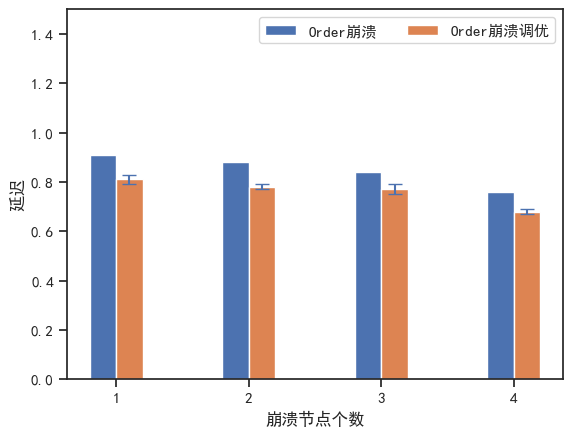

In [19]:
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.rcParams['font.sans-serif'] = ['KaiTi']
import seaborn as sns
sns.set(style='ticks')
plt.rcParams['font.sans-serif'] = 'SimHei'
x_labels = ['1', '2', '3', '4']
y_default = [0.91, 0.88, 0.84, 0.76]
y_aspsa = [0.81, 0.78, 0.77, 0.68]
plt.figure()
plt.ylim((0, 1.5))
bar_width = 0.2
index = range(len(x_labels))
plt.bar(index, y_default, width=bar_width, label='Order崩溃')
plt.bar([i + 1 * bar_width for i in index], y_aspsa, width=bar_width, label='Order崩溃调优')
error_bar_simulated_annealing1 = [0.02, 0.01, 0.02, 0.01]
plt.errorbar([i + 1 * bar_width for i in index], y_aspsa, yerr=error_bar_simulated_annealing1, fmt='none', capsize=5, label='_error_aspsa')
plt.xlabel('崩溃节点个数')
plt.ylabel('延迟')
plt.xticks([i + 0.5 * bar_width for i in index], x_labels)
plt.legend(ncol=3, loc='upper right')
plt.show()

In [82]:
# 计算变化百分比
percentage_changes = [((aspsa - default) / default) * 100 for default, aspsa in zip(y_default, y_aspsa)]
sum_p = 0
# 打印结果
for i, percentage_change in enumerate(percentage_changes):
    print(f"第{i + 1}个位置的变化百分比: {percentage_change:.2f}%")
    sum_p += percentage_change
print(sum_p/len(percentage_changes))

第1个位置的变化百分比: -10.99%
第2个位置的变化百分比: -11.36%
第3个位置的变化百分比: -8.33%
第4个位置的变化百分比: -10.53%
-10.303074118863588


In [ ]:
# \multirow{2}*{默认} & 吞吐量 & 303.5 & 296.2 & 1812.4 & 298.8 & 1826.6 & 283.0 \\
#     ~ & 延迟 & 0.92 & 0.71 & 0.05 & 0.64 & 0.05 & 0.92 \\
# \multirow{2}*{Ours（INSGA-II）} & 吞吐量 & \textbf{356.12} & \textbf{355.03} & \textbf{1890.00} & \textbf{343.09} & \textbf{1898.01} & \textbf{339.23} \\
#     ~ & 延迟 & \textbf{0.44} & \textbf{0.32} & \textbf{0.04} & \textbf{0.37} & \textbf{0.04} & \textbf{0.68} \\

In [90]:
default_performance = [303.5, 296.2, 1812.4, 298.8, 1826.6, 283.0, 0.92, 0.71, 0.05, 0.64, 0.05, 0.92]
opt_performance = [356.12,355.03,1890.00,343.09,1898.01,339.23, 0.44,0.32,0.04,0.37,0.04,0.68]
percentage_changes = [((aspsa - default) / default) * 100 for default, aspsa in zip(default_performance, opt_performance)]
sum_p = 0
# 打印结果
for i, percentage_change in enumerate(percentage_changes):
    print(f"第{i + 1}个位置的变化百分比: {percentage_change:.2f}%")
    if i > 6:
        sum_p += percentage_change
print(sum_p/6)
print((17.34 + 19.86 + 14.82 + 19.87) / 4)

第1个位置的变化百分比: 17.34%
第2个位置的变化百分比: 19.86%
第3个位置的变化百分比: 4.28%
第4个位置的变化百分比: 14.82%
第5个位置的变化百分比: 3.91%
第6个位置的变化百分比: 19.87%
第7个位置的变化百分比: -52.17%
第8个位置的变化百分比: -54.93%
第9个位置的变化百分比: -20.00%
第10个位置的变化百分比: -42.19%
第11个位置的变化百分比: -20.00%
第12个位置的变化百分比: -26.09%
-27.200672331087976
17.9725


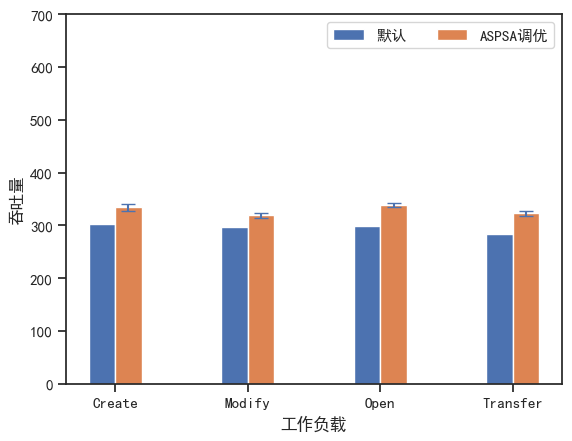

In [8]:
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.rcParams['font.sans-serif'] = ['KaiTi']
import seaborn as sns
sns.set(style='ticks')
plt.rcParams['font.sans-serif'] = 'SimHei'
# 您提供的数据（示例数据，请替换为实际的数值）
x_labels = ['Create', 'Modify', 'Open', 'Transfer']
y_default = [303.5, 296.2, 298.8, 283.0]  # 请替换为实际的默认值
# 303.5 296.2 1812.4 298.8 1826.6 283.0
y_bayesian = [303.5, 296.2, 298.8]  # 请替换为实际的贝叶斯值
#  317.97 308.85 1863.41 341.17 1889.81 327.51
# 317.97 & 308.85 & 1863.41 & 338.36 & 1889.81 & 324.02
y_aspsa = [333.97, 318.85, 338.17, 322.8]  # 请替换为实际的ASPSA值
y_simulated_annealing = [323.5, 316.2, 318.8]  # 请替换为实际的模拟退火值
y_aspsa1 = [347.97, 348.85, 331.17]
y_aspsa2 = [387.97, 378.85, 371.17]
plt.figure()
plt.ylim((0, 700))
bar_width = 0.2
index = range(len(x_labels))
plt.bar(index, y_default, width=bar_width, label='默认')
plt.bar([i + 1 * bar_width for i in index], y_aspsa, width=bar_width, label='ASPSA调优')
# plt.bar([i + 2 * bar_width for i in index], y_bayesian, width=bar_width, label='Order崩溃')
# plt.bar([i + 3 * bar_width for i in index], y_aspsa1, width=bar_width, label='Order崩溃调优')
# plt.bar([i + 4 * bar_width for i in index], y_simulated_annealing, width=bar_width, label='E3默认')
# plt.bar([i + 5 * bar_width for i in index], y_aspsa2, width=bar_width, label='E3调优')

error_bar_bayesian = [4, 5, 2]  # 请替换为实际的误差值
error_bar_aspsa = [3, 4, 1]  # 请替换为实际的误差值
error_bar_simulated_annealing = [6, 5, 4, 5]  # 请替换为实际的误差值
error_bar_simulated_annealing1 = [6, 5, 4, 5]  # 请替换为实际的误差值
# plt.errorbar([i + 2 * bar_width for i in index], y_bayesian, yerr=error_bar_bayesian, fmt='none', capsize=5, label='_error_bayesian')
# plt.errorbar([i + 3 * bar_width for i in index], y_aspsa1, yerr=error_bar_aspsa, fmt='none', capsize=5, label='_error_aspsa')
plt.errorbar([i + 1 * bar_width for i in index], y_aspsa, yerr=error_bar_simulated_annealing1, fmt='none', capsize=5, label='_error_aspsa')
# plt.errorbar([i + 4 * bar_width for i in index], y_simulated_annealing, yerr=error_bar_simulated_annealing, fmt='none', capsize=5, label='_error_simulated_annealing')
# plt.errorbar([i + 5 * bar_width for i in index], y_aspsa2, yerr=error_bar_simulated_annealing, fmt='none', capsize=5, label='_error_simulated_annealing')

plt.xlabel('工作负载')
plt.ylabel('吞吐量')
plt.xticks([i + 0.5 * bar_width for i in index], x_labels)
plt.legend(ncol=2, loc='upper right')
plt.show()

In [9]:
# 计算变化百分比
percentage_changes = [((aspsa - default) / default) * 100 for default, aspsa in zip(y_default, y_aspsa)]
sum_p = 0
# 打印结果
for i, percentage_change in enumerate(percentage_changes):
    print(f"第{i + 1}个位置的变化百分比: {percentage_change:.2f}%")
    sum_p += percentage_change
print(sum_p/len(percentage_changes))

第1个位置的变化百分比: 10.04%
第2个位置的变化百分比: 7.65%
第3个位置的变化百分比: 13.18%
第4个位置的变化百分比: 14.06%
11.231510167028873


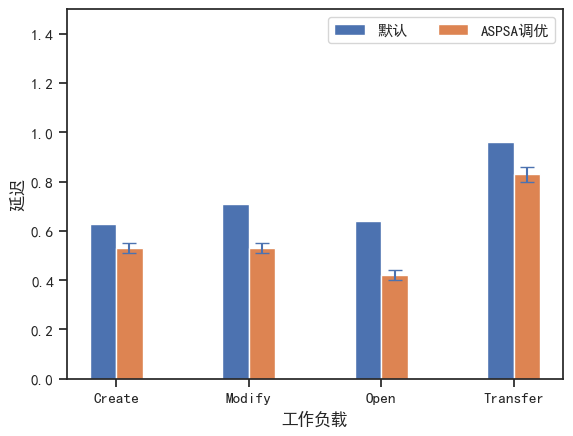

In [31]:
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.rcParams['font.sans-serif'] = ['KaiTi']
import seaborn as sns
sns.set(style='ticks')
plt.rcParams['font.sans-serif'] = 'SimHei'
x_labels = ['Create', 'Modify', 'Open', 'Transfer']
y_default = [0.63, 0.71, 0.64, 0.96]
# 0.92 & 0.71 & 0.05 & 0.64 & 0.05 & 0.92
y_aspsa = [0.53, 0.53, 0.42, 0.83]
# 0.44} & \textbf{0.32} & \textbf{0.04} & \textbf{0.37} & \textbf{0.04} & \textbf{0.68
# 0.53 & 0.57 & 0.04 & 0.46 & 0.04 & 0.88
plt.figure()
plt.ylim((0, 1.5))
bar_width = 0.2
index = range(len(x_labels))
plt.bar(index, y_default, width=bar_width, label='默认')
plt.bar([i + 1 * bar_width for i in index], y_aspsa, width=bar_width, label='ASPSA调优')
error_bar_simulated_annealing1 = [0.02, 0.02, 0.02, 0.03]
plt.errorbar([i + 1 * bar_width for i in index], y_aspsa, yerr=error_bar_simulated_annealing1, fmt='none', capsize=5, label='_error_aspsa')
plt.xlabel('工作负载')
plt.ylabel('延迟')
plt.xticks([i + 0.5 * bar_width for i in index], x_labels)
plt.legend(ncol=3, loc='upper right')
plt.show()

In [32]:
# 计算变化百分比
percentage_changes = [((aspsa - default) / default) * 100 for default, aspsa in zip(y_default, y_aspsa)]
sum_p = 0
# 打印结果
for i, percentage_change in enumerate(percentage_changes):
    print(f"第{i + 1}个位置的变化百分比: {percentage_change:.2f}%")
    sum_p += percentage_change
print(sum_p/len(percentage_changes))

第1个位置的变化百分比: -15.87%
第2个位置的变化百分比: -25.35%
第3个位置的变化百分比: -34.38%
第4个位置的变化百分比: -13.54%
-22.28544880393472


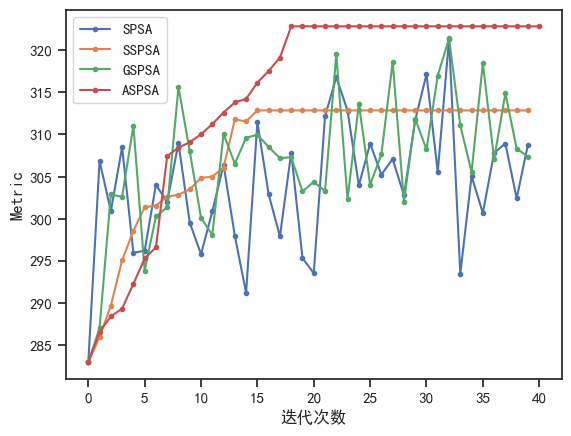

In [57]:
import seaborn as sns
sns.set(style='ticks')
plt.rcParams['font.sans-serif'] = 'SimHei'
# default_objs = [297.14, 306.61, 318.43, 285.37, 315.29, 307.31, 295.61, 310.44, 301.43, 296.07, 311.01, 311.22, 304.59, 301.78, 318.21, 290.13, 313.51, 304.1, 322.8, 322.8, 322.8, 322.8, 322.8, 322.8, 322.8, 322.8, 322.8, 322.8, 322.8, 322.8, 322.8, 322.8, 322.8, 322.8, 322.8,322.8, 322.8, 322.8, 322.8, 322.8, 322.8]
# plt.plot(range(len(default_objs)), default_objs, label='Default', marker='o', markersize=3)
objective_values1 = [283.0, 306.87, 300.91, 308.48, 295.97, 296.22, 304.02, 302.02, 308.98, 299.54, 295.8, 300.87, 306.41, 297.97, 291.23, 311.45, 302.9, 297.91, 307.85, 295.35, 293.56, 312.13, 316.78, 312.79, 303.96, 308.9, 305.24, 307.08, 302.78, 311.68, 317.11, 305.55, 321.27, 293.47, 305.07, 300.69, 307.81, 308.92, 302.41, 308.79]
plt.plot(range(len(objective_values1)), objective_values1, label='SPSA', marker='o', markersize=3)
objective_values2 = [283.0, 286.0, 289.71, 295.08, 298.57, 301.37, 301.57, 302.62, 302.85, 303.49, 304.84, 305.0, 306.07, 311.77, 311.54, 312.84, 312.84, 312.84, 312.84, 312.84, 312.84, 312.84, 312.84, 312.84, 312.84, 312.84, 312.84, 312.84, 312.84, 312.84, 312.84, 312.84, 312.84, 312.84, 312.84, 312.84, 312.84, 312.84, 312.84, 312.84]
plt.plot(range(len(objective_values2)), objective_values2, label='SSPSA', marker='o', markersize=3)
objective_values3 = [283.0, 287.07, 302.88, 302.61, 311.03, 293.87, 300.28, 301.38, 315.6, 308.01, 300.12, 298.1, 310.04, 306.53, 309.6, 309.96, 308.5, 307.18, 307.31, 303.24, 304.38, 303.3, 319.48, 302.32, 313.63, 304.04, 307.63, 318.59, 302.04, 311.86, 308.21, 316.97, 321.36, 311.07, 305.53, 318.43, 307.07, 314.87, 308.32, 307.36]
plt.plot(range(len(objective_values3)), objective_values3, label='GSPSA', marker='o', markersize=3)
objective_values_optimize = [283.0, 286.61, 288.43, 289.37, 292.29, 295.31, 296.61, 307.44, 308.43, 309.07, 310.01, 311.22, 312.59, 313.78, 314.21, 316.13, 317.51, 319.1, 322.8, 322.8, 322.8, 322.8, 322.8, 322.8, 322.8, 322.8, 322.8, 322.8, 322.8, 322.8, 322.8, 322.8, 322.8, 322.8, 322.8,322.8, 322.8, 322.8, 322.8, 322.8, 322.8]
plt.plot(range(len(objective_values_optimize)), objective_values_optimize, label='ASPSA', marker='o', markersize=3)

plt.xlabel('迭代次数')
plt.ylabel('Metric')
plt.legend()
# plt.title('Change of Objective Function Value')
plt.show()

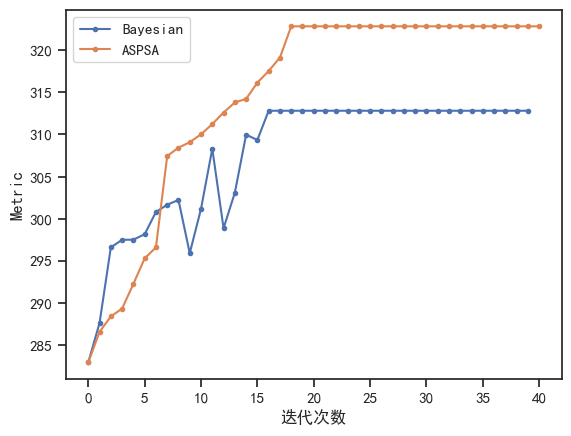

In [67]:
import seaborn as sns
sns.set(style='ticks')
plt.rcParams['font.sans-serif'] = 'SimHei'
default_objs = [283.0, 287.67, 296.62, 297.51, 297.53, 298.17, 300.81, 301.67, 302.23, 295.93, 301.18, 308.31, 298.88, 303.09, 309.96, 309.34, 312.8, 312.8, 312.8, 312.8, 312.8, 312.8, 312.8, 312.8, 312.8, 312.8, 312.8, 312.8, 312.8, 312.8, 312.8, 312.8, 312.8, 312.8, 312.8, 312.8, 312.8, 312.8, 312.8, 312.8]
plt.plot(range(len(default_objs)), default_objs, label='Bayesian', marker='o', markersize=3)
# objective_values1 = [283.0, 306.87, 300.91, 308.48, 295.97, 296.22, 304.02, 302.02, 308.98, 299.54, 295.8, 300.87, 306.41, 297.97, 291.23, 311.45, 302.9, 297.91, 307.85, 295.35, 293.56, 312.13, 316.78, 312.79, 303.96, 308.9, 305.24, 307.08, 302.78, 311.68, 317.11, 305.55, 321.27, 293.47, 305.07, 300.69, 307.81, 308.92, 302.41, 308.79]
# plt.plot(range(len(objective_values1)), objective_values1, label='SPSA', marker='o', markersize=3)
# objective_values2 = [283.0, 286.0, 289.71, 295.08, 298.57, 301.37, 301.57, 302.62, 302.85, 303.49, 304.84, 305.0, 306.07, 311.77, 311.54, 312.84, 312.84, 312.84, 312.84, 312.84, 312.84, 312.84, 312.84, 312.84, 312.84, 312.84, 312.84, 312.84, 312.84, 312.84, 312.84, 312.84, 312.84, 312.84, 312.84, 312.84, 312.84, 312.84, 312.84, 312.84]
# plt.plot(range(len(objective_values2)), objective_values2, label='SSPSA', marker='o', markersize=3)
# objective_values3 = [283.0, 287.07, 302.88, 302.61, 311.03, 293.87, 300.28, 301.38, 315.6, 308.01, 300.12, 298.1, 310.04, 306.53, 309.6, 309.96, 308.5, 307.18, 307.31, 303.24, 304.38, 303.3, 319.48, 302.32, 313.63, 304.04, 307.63, 318.59, 302.04, 311.86, 308.21, 316.97, 321.36, 311.07, 305.53, 318.43, 307.07, 314.87, 308.32, 307.36]
# plt.plot(range(len(objective_values3)), objective_values3, label='GSPSA', marker='o', markersize=3)
objective_values_optimize = [283.0, 286.61, 288.43, 289.37, 292.29, 295.31, 296.61, 307.44, 308.43, 309.07, 310.01, 311.22, 312.59, 313.78, 314.21, 316.13, 317.51, 319.1, 322.8, 322.8, 322.8, 322.8, 322.8, 322.8, 322.8, 322.8, 322.8, 322.8, 322.8, 322.8, 322.8, 322.8, 322.8, 322.8, 322.8,322.8, 322.8, 322.8, 322.8, 322.8, 322.8]
plt.plot(range(len(objective_values_optimize)), objective_values_optimize, label='ASPSA', marker='o', markersize=3)

plt.xlabel('迭代次数')
plt.ylabel('Metric')
plt.legend()
# plt.title('Change of Objective Function Value')
plt.show()

In [59]:
import random

random_numbers = [round(random.uniform(283.0, 312.8), 2) for _ in range(40)]

print(random_numbers)

[303.28, 297.67, 306.62, 297.51, 287.53, 288.17, 300.81, 311.67, 312.23, 295.93, 310.18, 288.31, 298.88, 303.09, 289.96, 303.34, 287.49, 308.58, 302.91, 293.7, 291.55, 295.96, 295.19, 295.91, 285.31, 305.21, 289.02, 285.1, 285.63, 301.0, 304.79, 287.85, 303.09, 291.47, 293.63, 311.7, 303.17, 295.23, 304.95, 310.47]
